In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import warnings
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)


In [25]:
#import dataset
df1=pd.read_csv('../Datasets/water_potability.csv')

In [26]:
df1.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [28]:
df1.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [29]:
df1.duplicated().value_counts()

False    3276
Name: count, dtype: int64

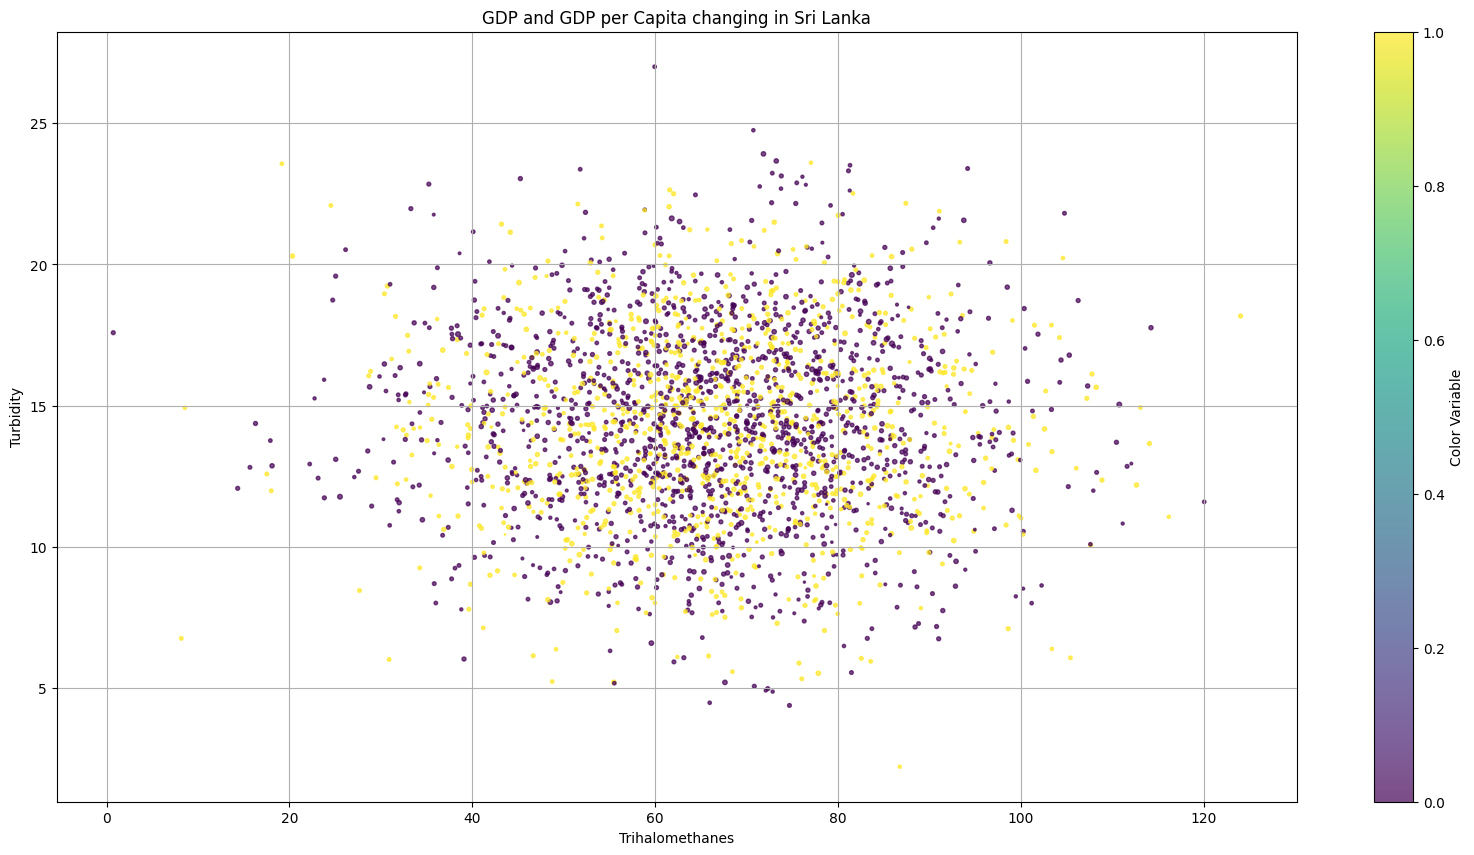

In [30]:
x = df1['Trihalomethanes']
y = df1['Organic_carbon']
sizes = df1['ph']  # Optional: Size of markers based on another variable
colors =df1['Potability'] # Optional: Color of markers based on another variable

# Scatter plot with customizations
plt.scatter(x, y, s=sizes, c=colors, alpha=0.7, cmap='viridis', marker='o')

# Add colorbar (if using color based on another variable)
plt.colorbar(label='Color Variable')

# Add labels and title
plt.xlabel('Trihalomethanes')
plt.ylabel('Turbidity')
plt.title('GDP and GDP per Capita changing in Sri Lanka')

#Add annotations or other customizations as needed

# Show plot
plt.grid(True)
plt.show()



In [31]:
df1=df1.round(2)

In [32]:
df1.head()

ph  Hardness    Solids  Chloramines  Sulfate  Conductivity  \
0   NaN    204.89  20791.32         7.30   368.52        564.31   
1  3.72    129.42  18630.06         6.64      NaN        592.89   
2  8.10    224.24  19909.54         9.28      NaN        418.61   
3  8.32    214.37  22018.42         8.06   356.89        363.27   
4  9.09    181.10  17978.99         6.55   310.14        398.41   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0           10.38            86.99       2.96           0  
1           15.18            56.33       4.50           0  
2           16.87            66.42       3.06           0  
3           18.44           100.34       4.63           0  
4           11.56            32.00       4.08           0

In [33]:
df1=df1.dropna()

In [34]:
df1.head()

ph  Hardness    Solids  Chloramines  Sulfate  Conductivity  \
3   8.32    214.37  22018.42         8.06   356.89        363.27   
4   9.09    181.10  17978.99         6.55   310.14        398.41   
5   5.58    188.31  28748.69         7.54   326.68        280.47   
6  10.22    248.07  28749.72         7.51   393.66        283.65   
7   8.64    203.36  13672.09         4.56   303.31        474.61   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
3           18.44           100.34       4.63           0  
4           11.56            32.00       4.08           0  
5            8.40            54.92       2.56           0  
6           13.79            84.60       2.67           0  
7           12.36            62.80       4.40           0

In [35]:


# Filter records where Potability equals 0 and 1
potability_zero_df = df1[df1['Potability'] == 0]
potability_one_df = df1[df1['Potability'] == 1]



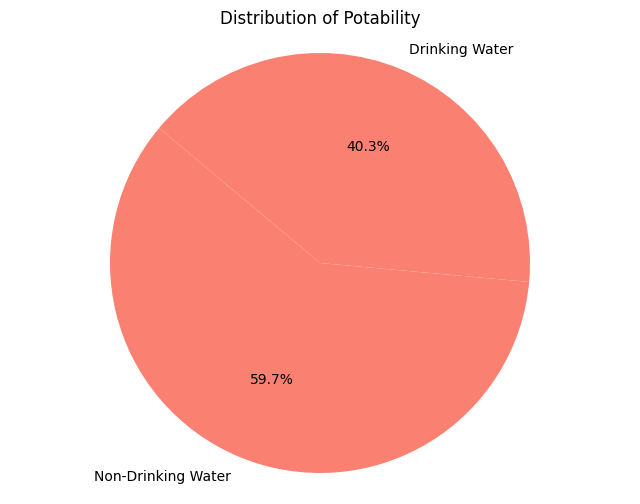

In [36]:

potability_counts = df1['Potability'].value_counts()

# Define custom labels for the potability values
potability_labels = {1: 'Drinking Water', 0: 'Non-Drinking Water'}

# Create a pie chart with custom appearance
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.pie(potability_counts, labels=potability_counts.index.map(potability_labels), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Potability')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


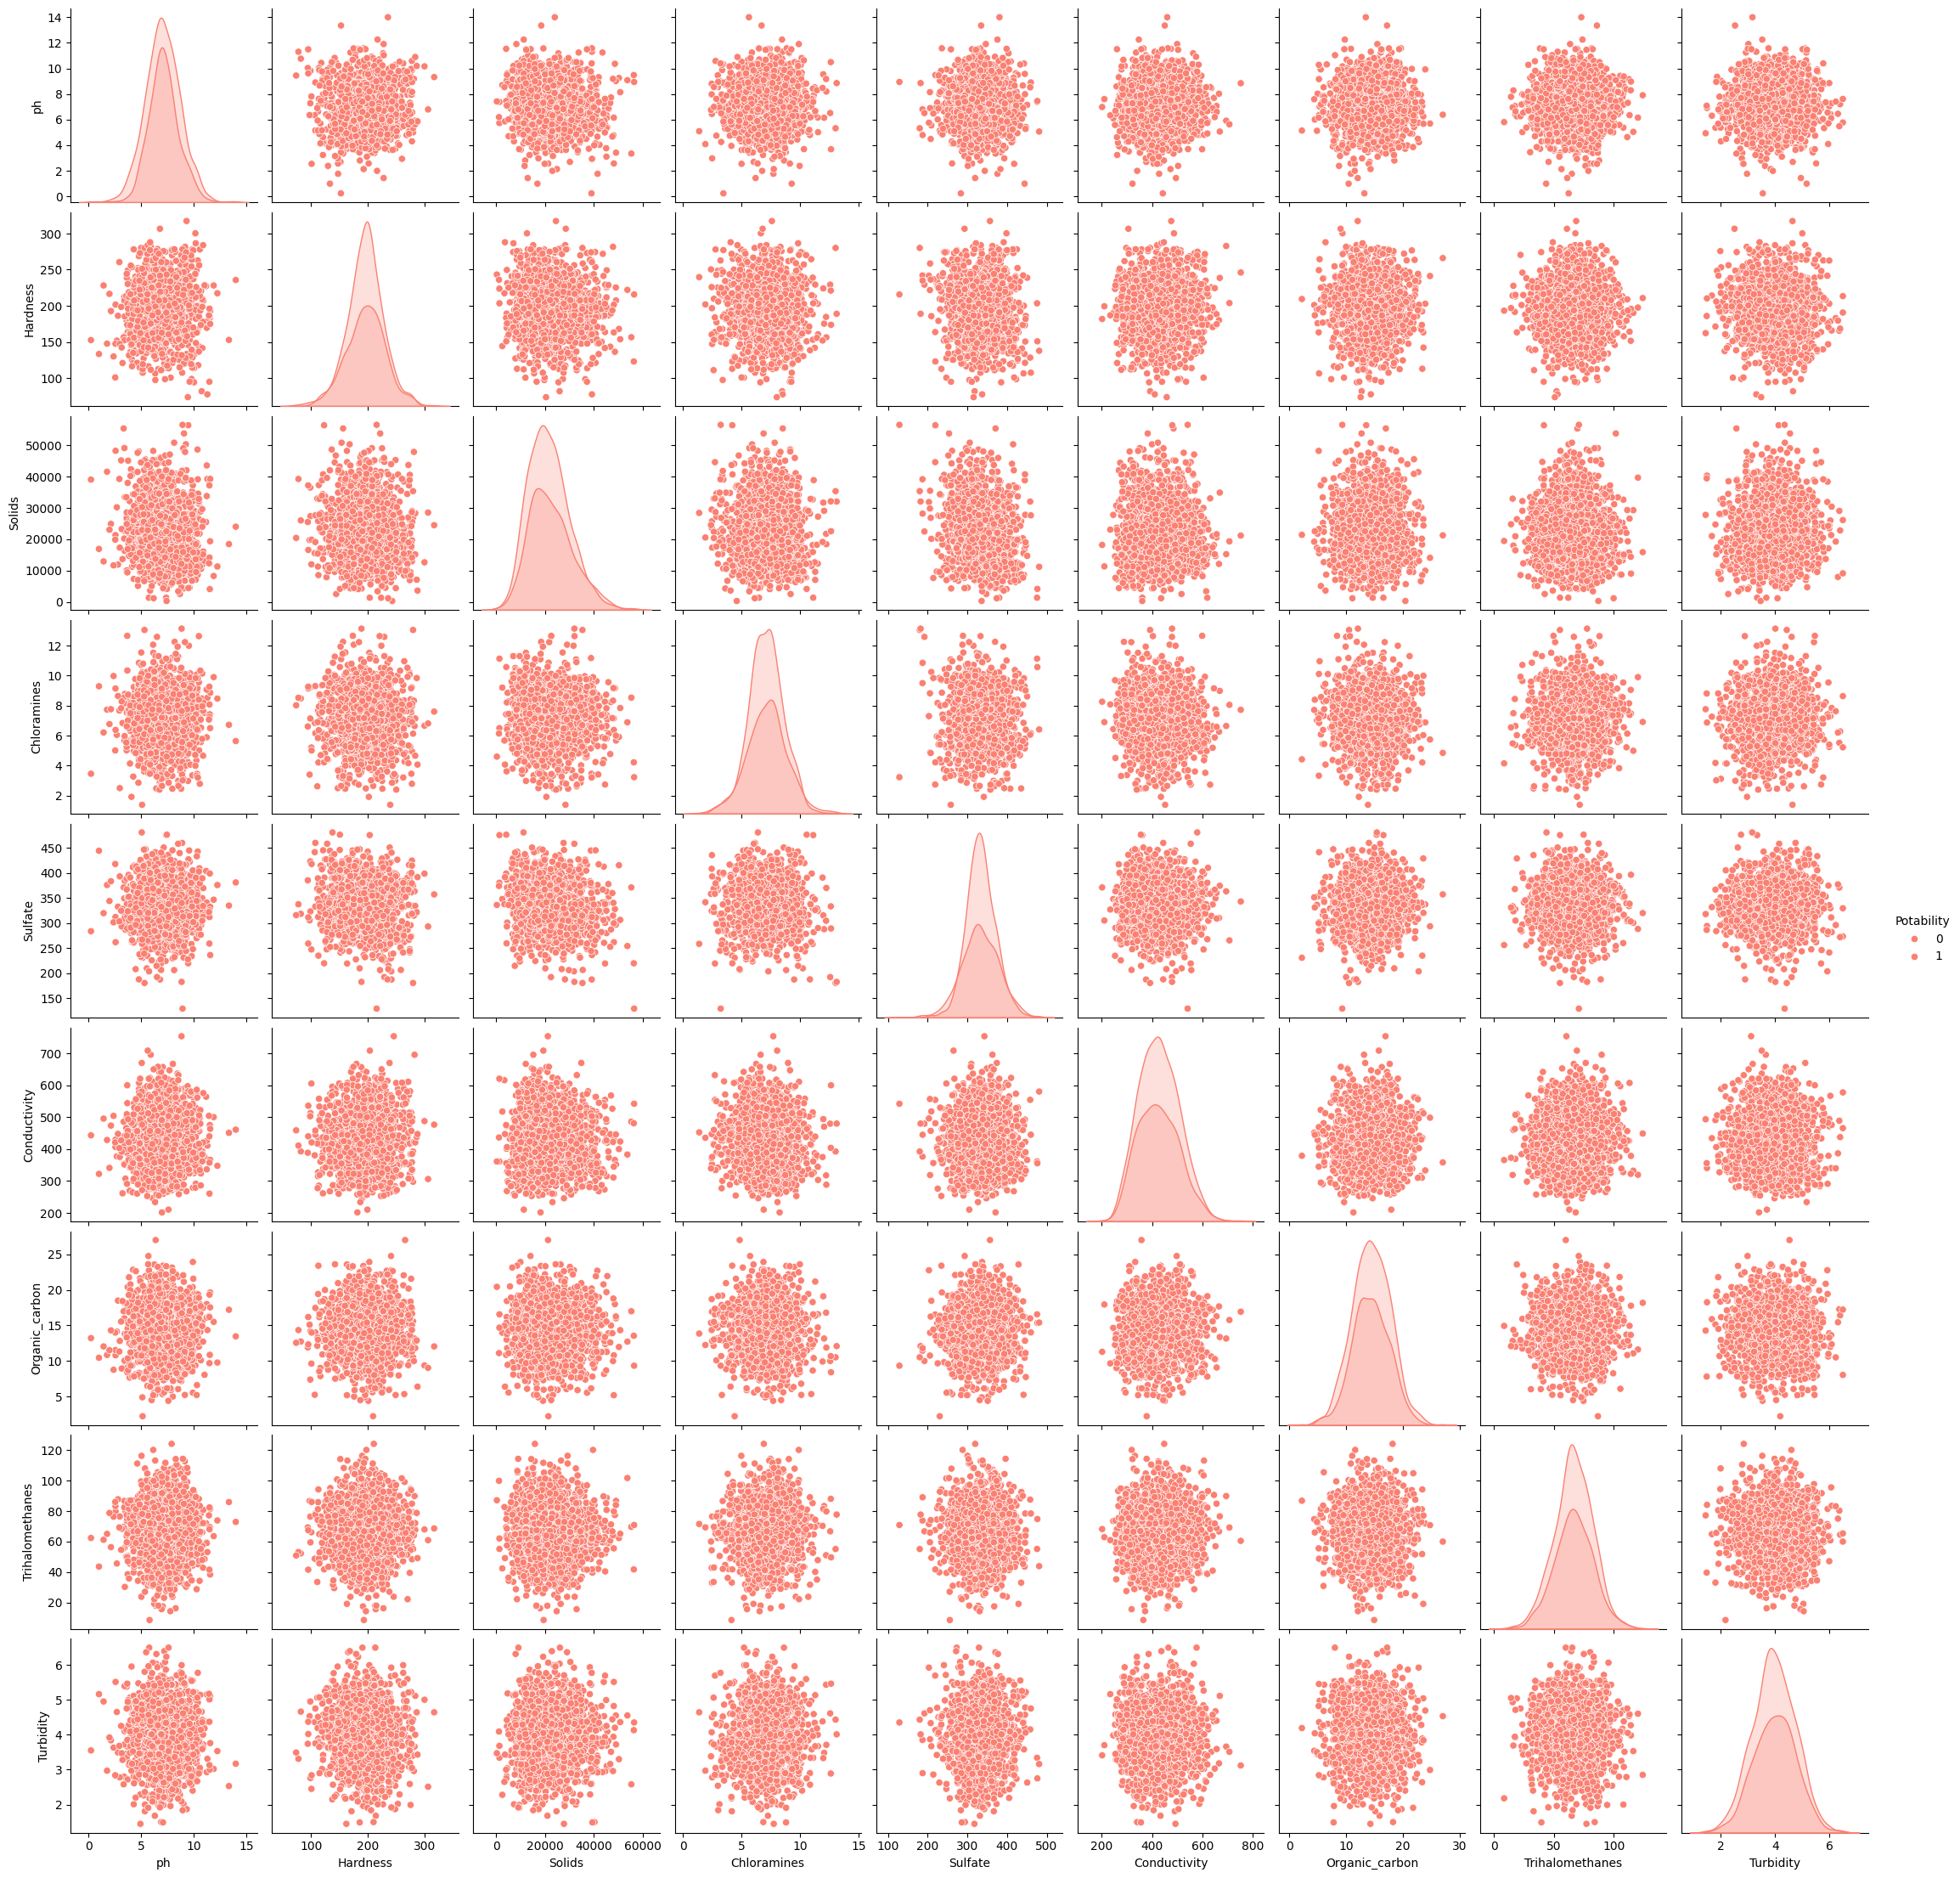

In [37]:
sns.pairplot(df1, hue="Potability")

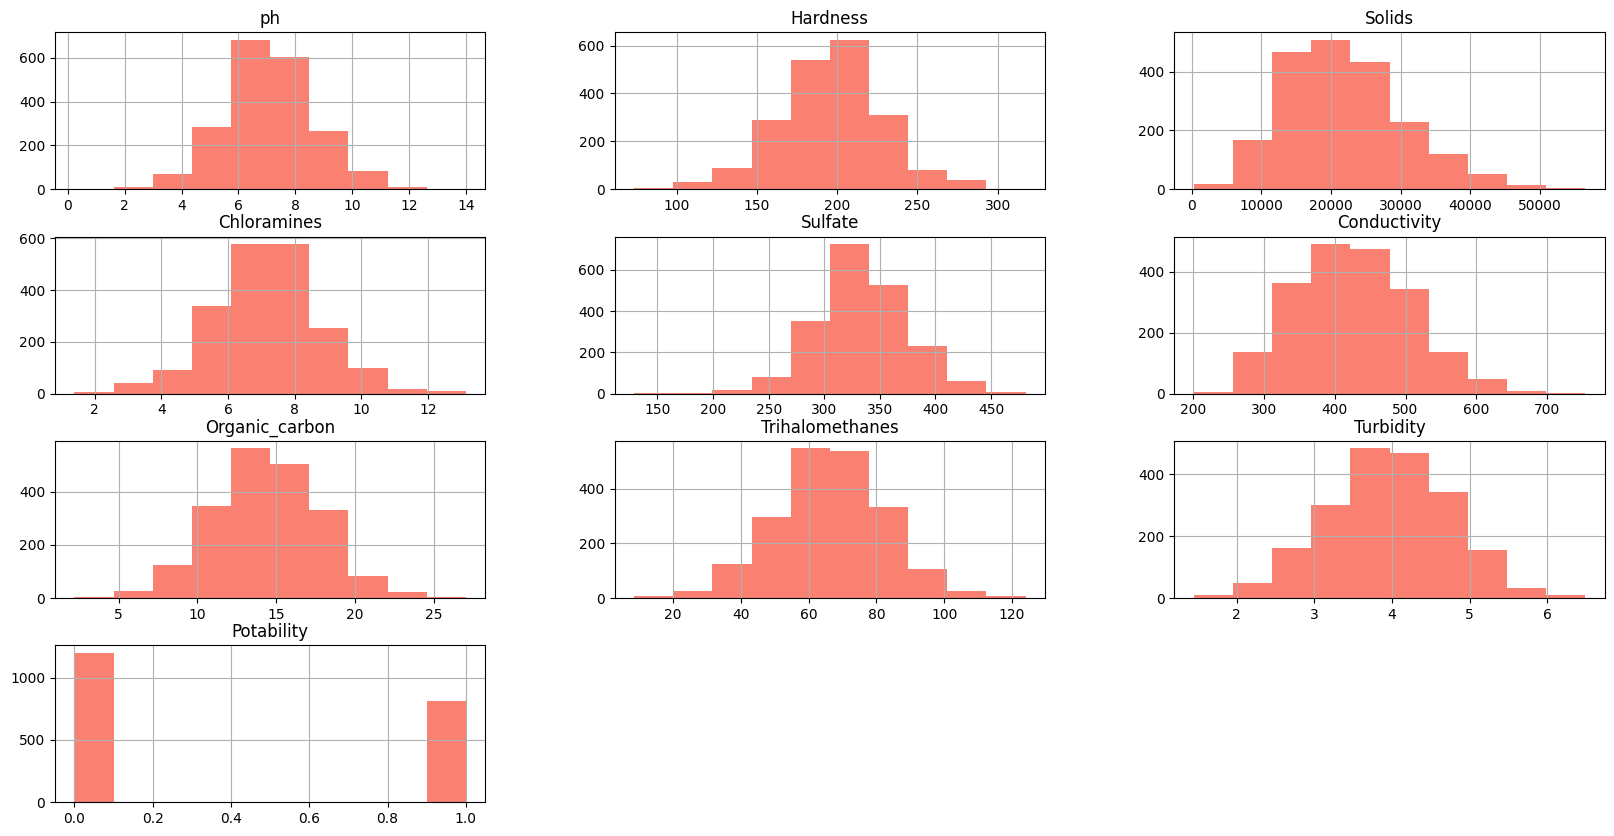

In [38]:
plt.rcParams['figure.figsize'] = [20,10]
df1.hist()
plt.show()

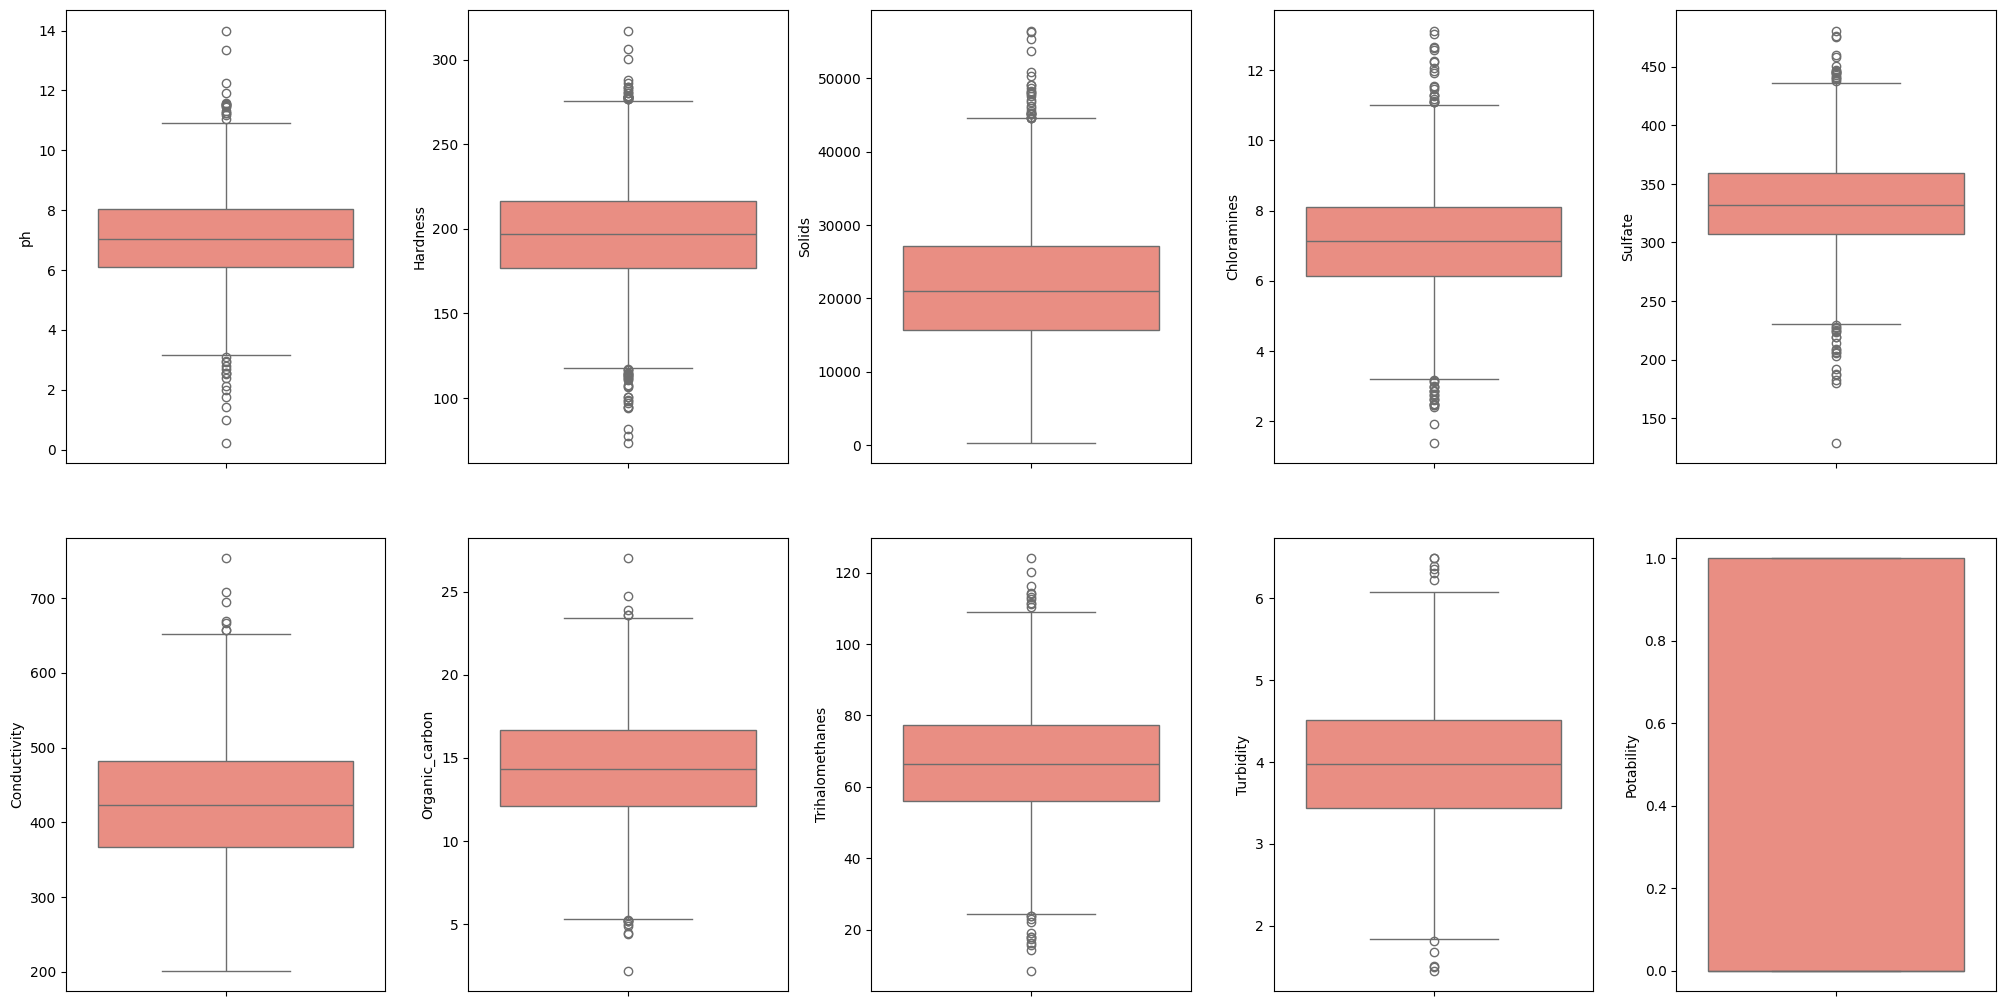

In [39]:
# Visualizing dataset and also checking for outliers 

fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in df1.items():
    sns.boxplot(y=col, data=df1, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

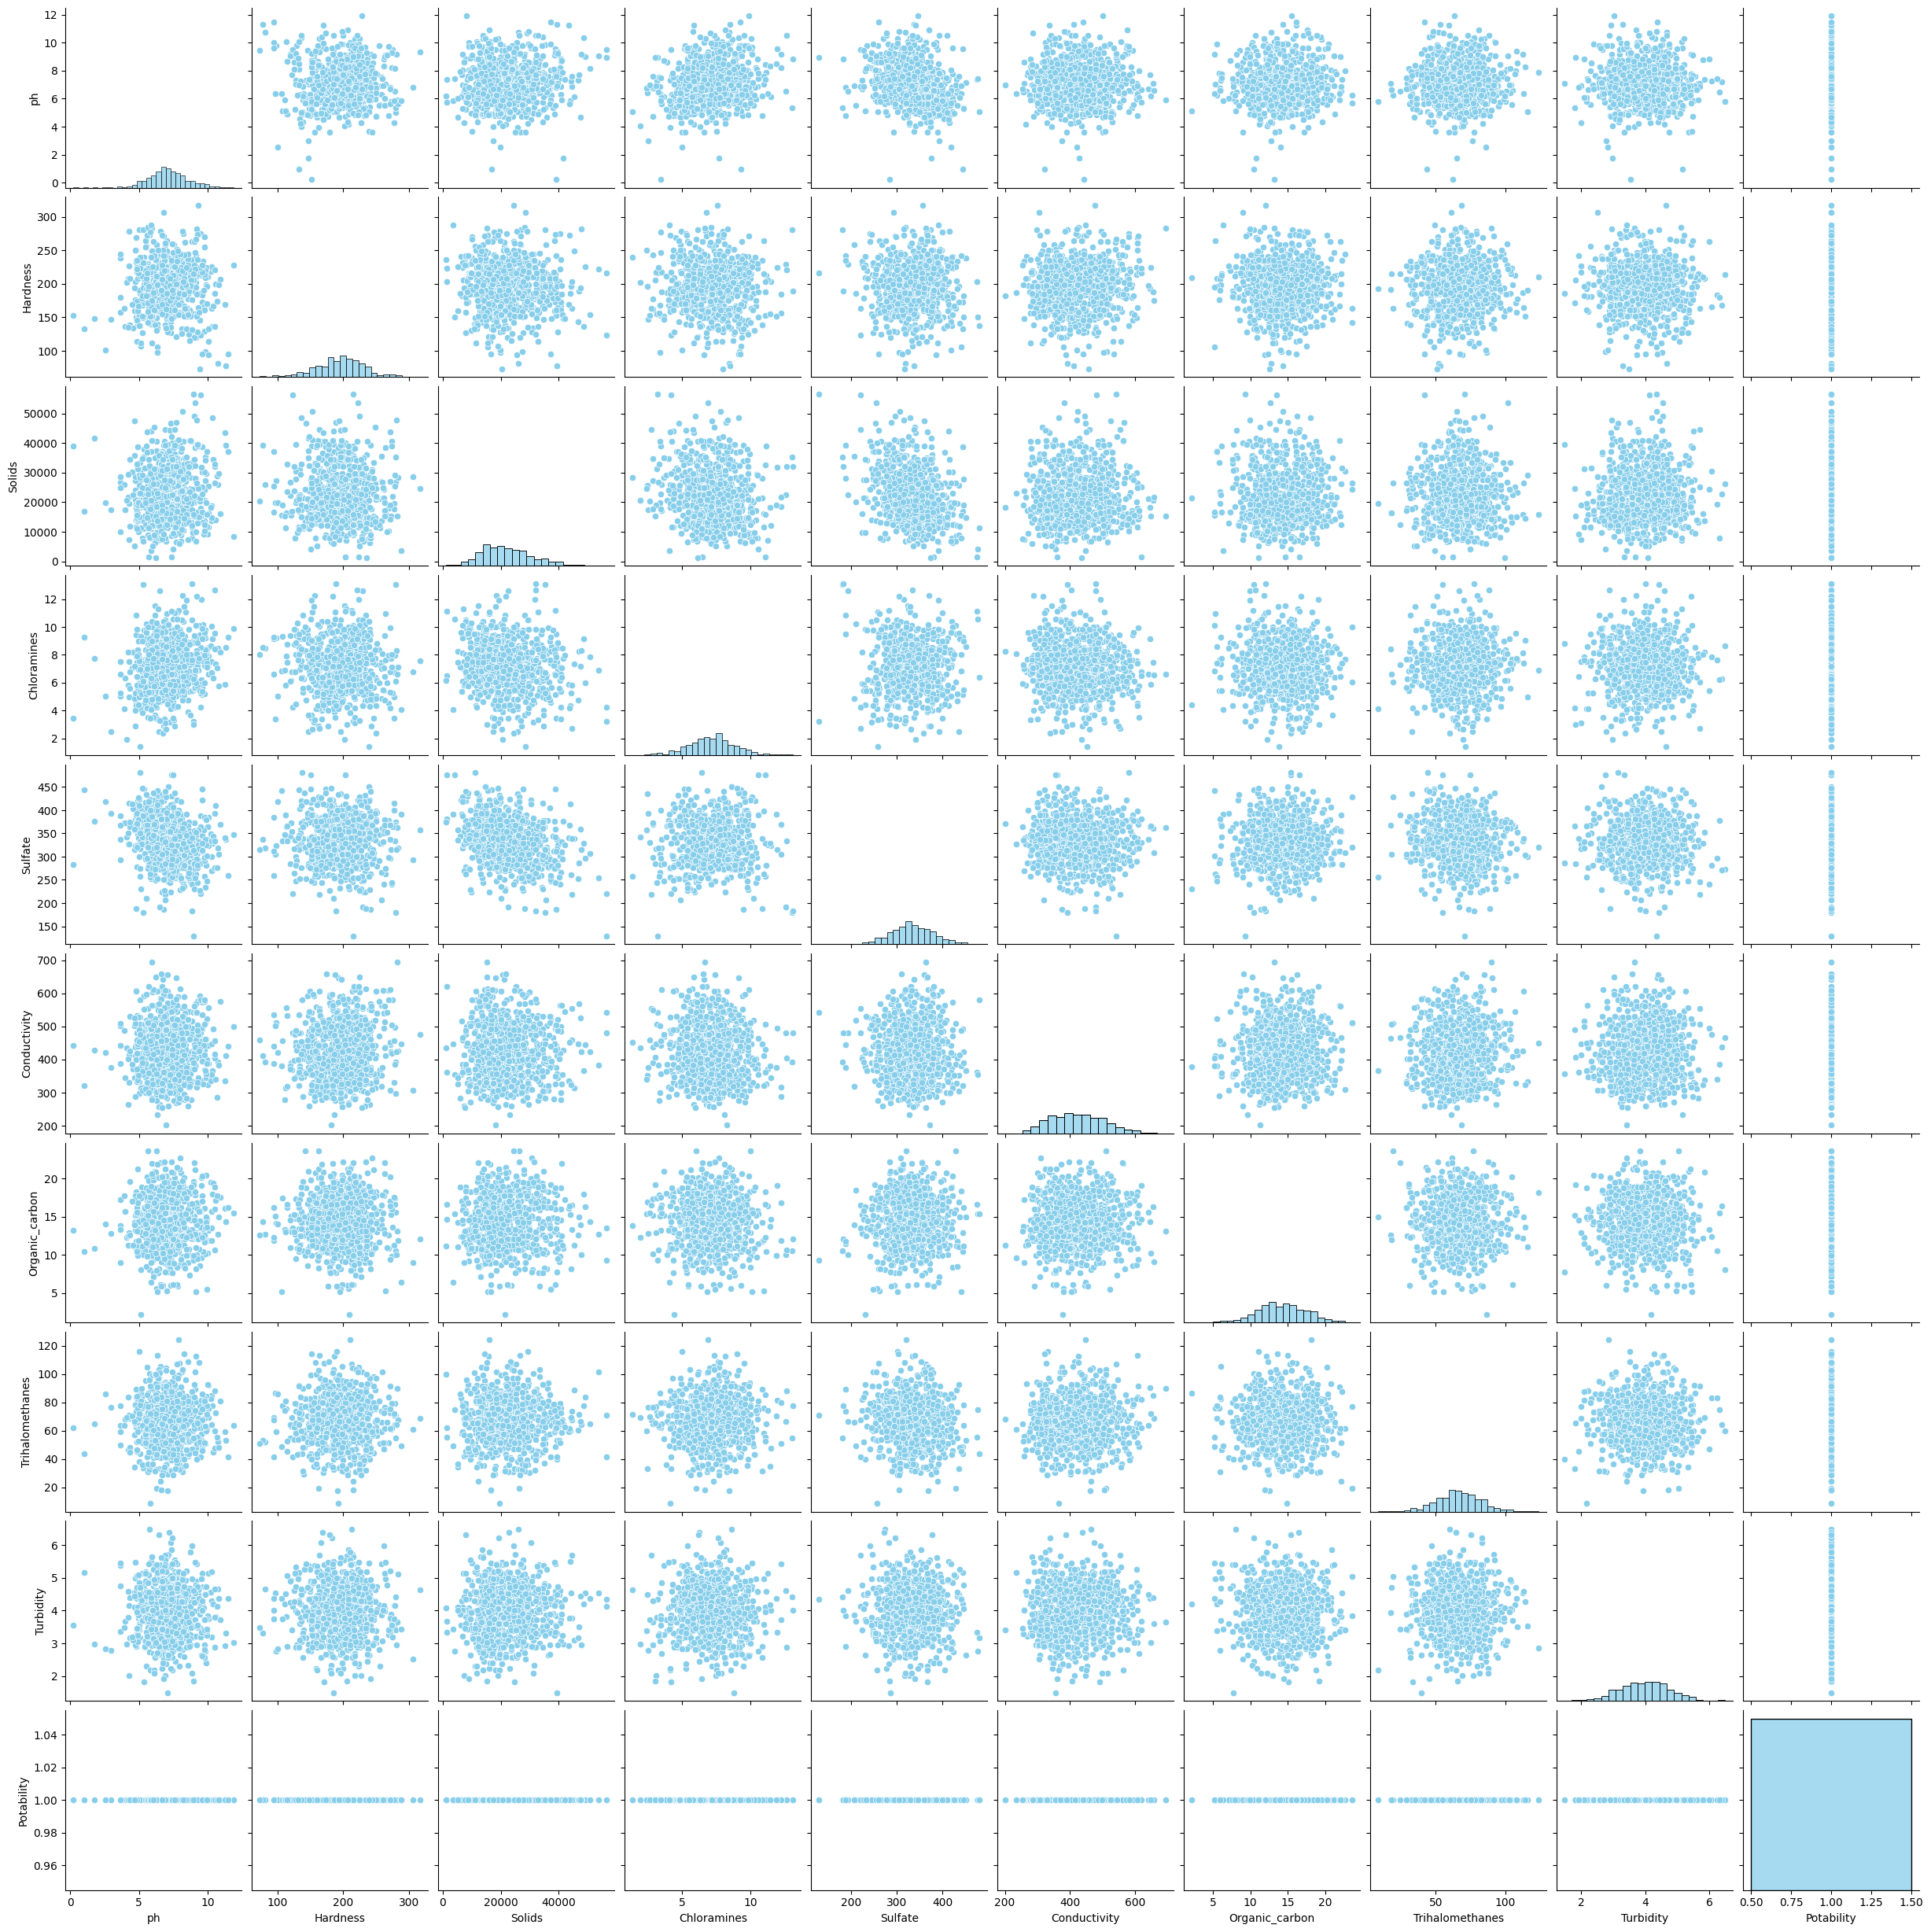

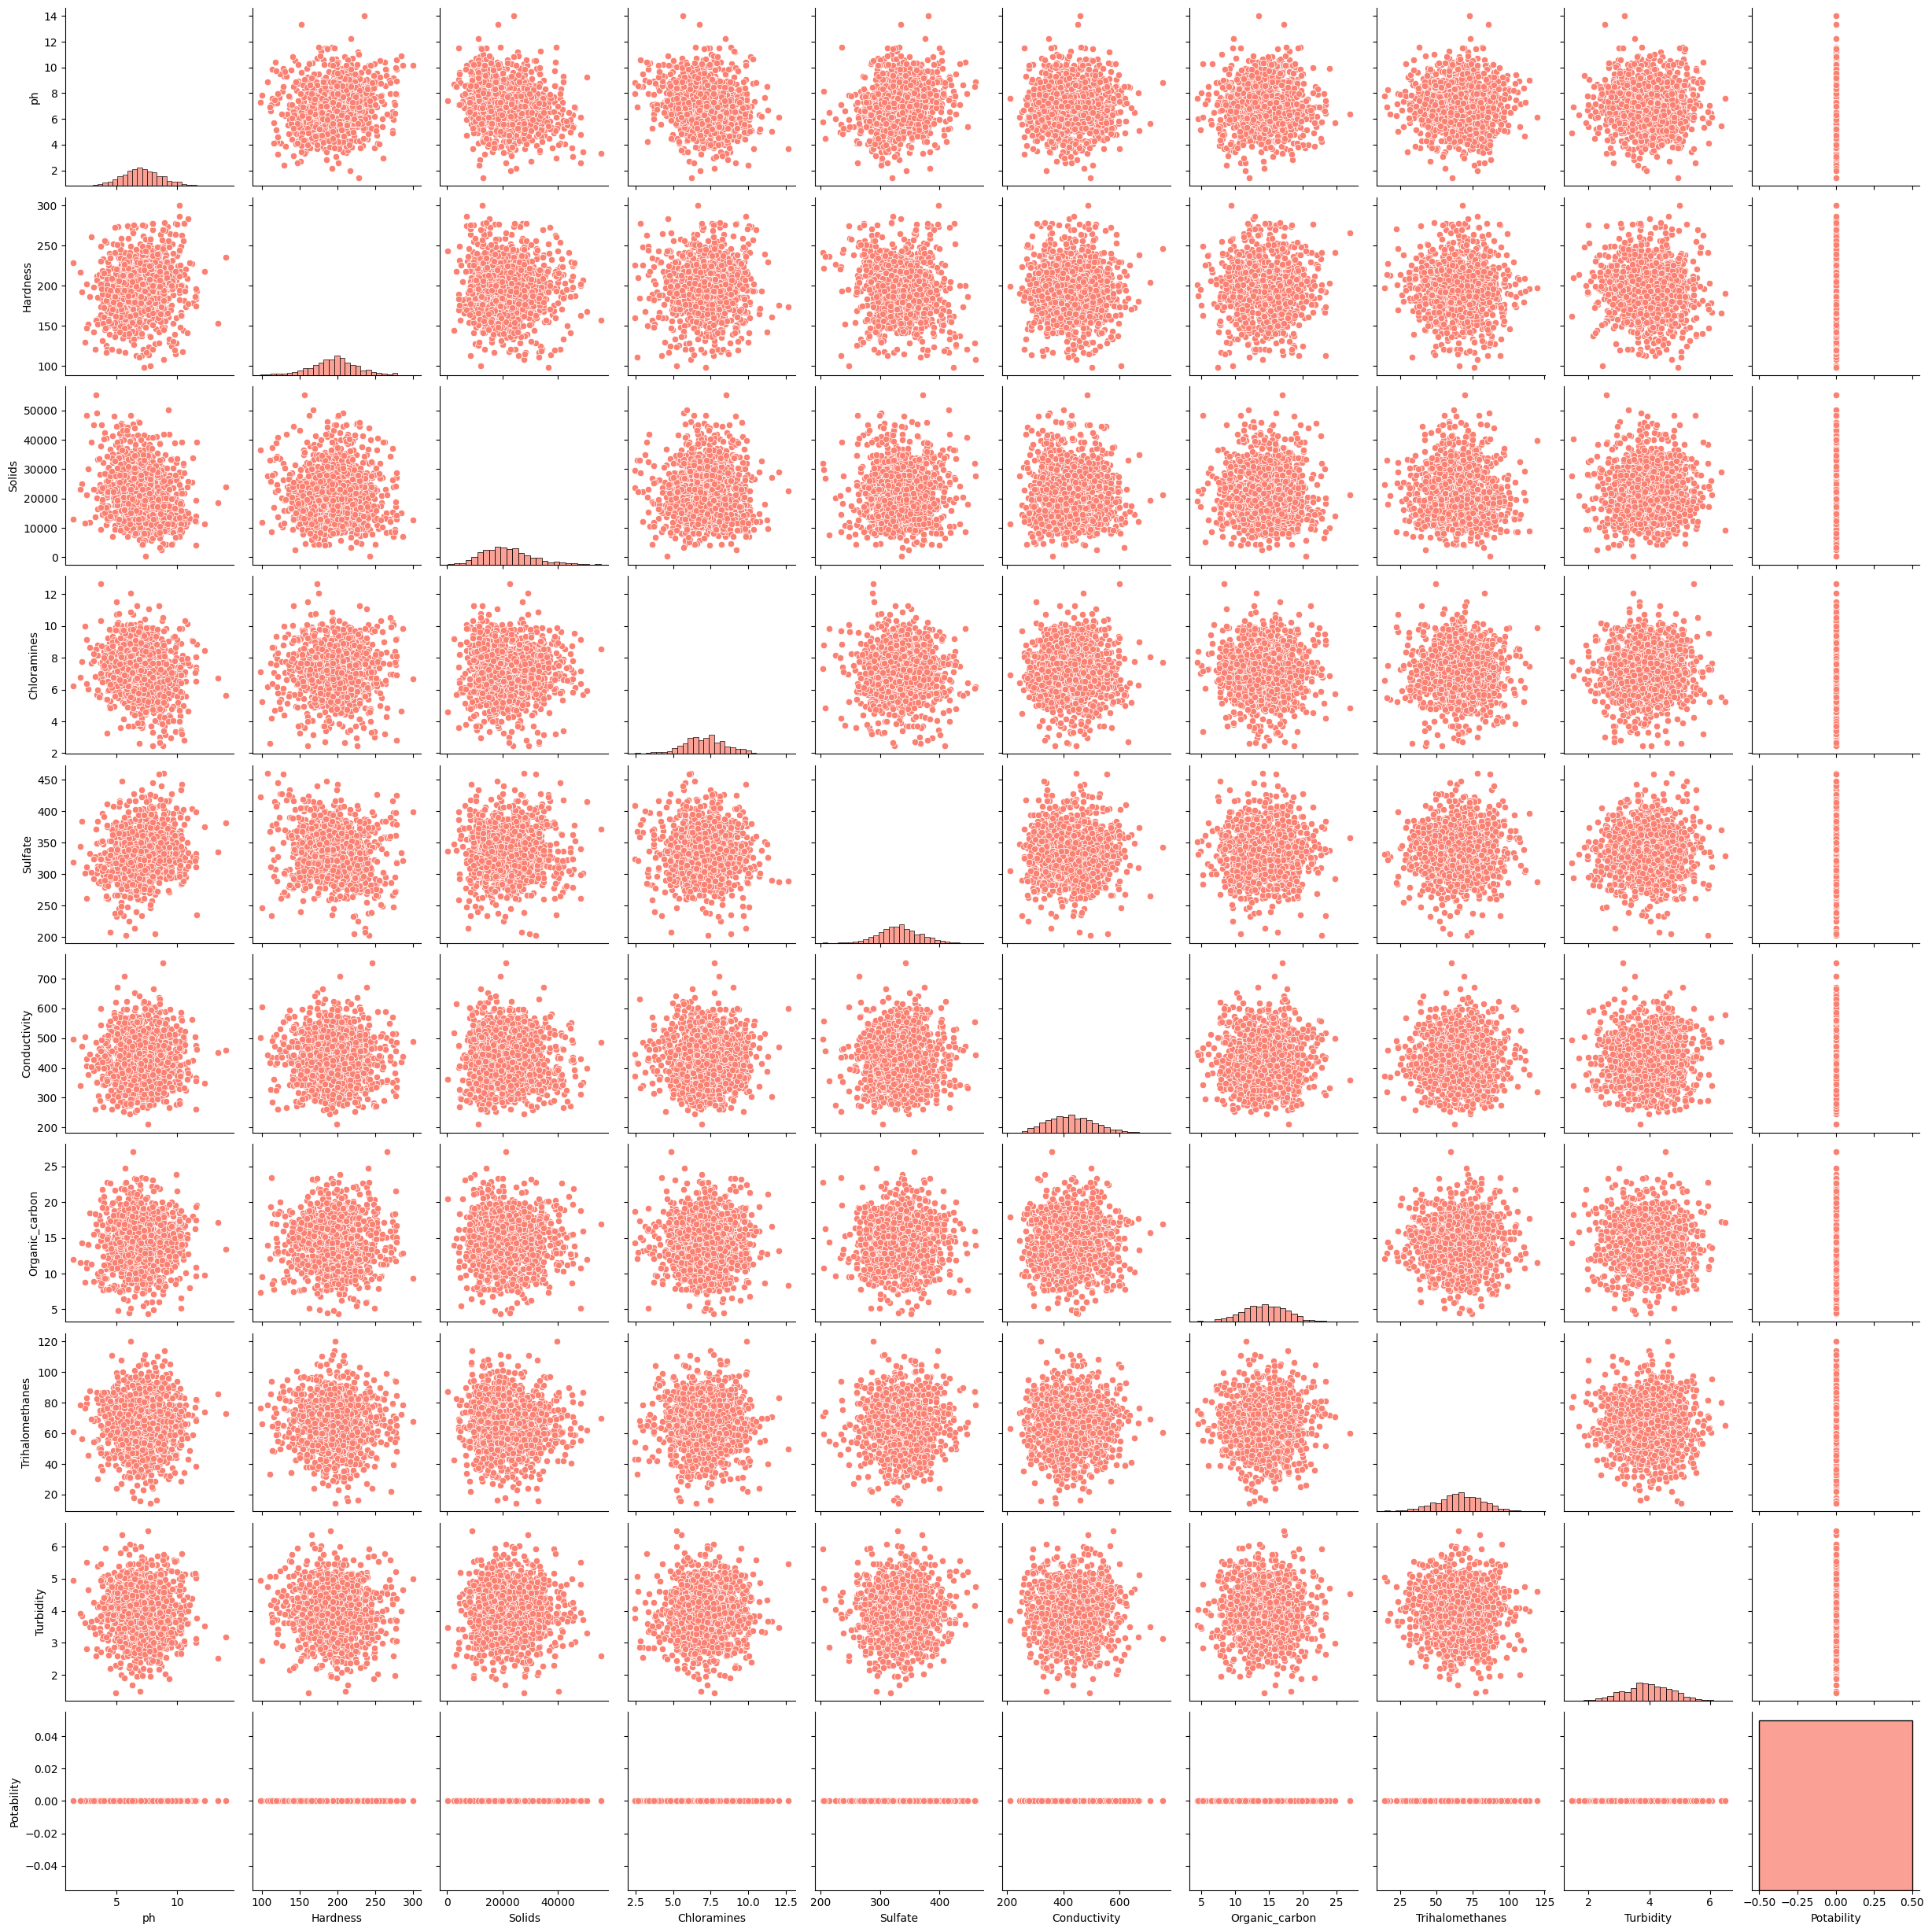

In [40]:

import plotly.express as px


# Define custom palette for both pairplots
custom_palette_one = ['skyblue'] * len(potability_one_df.columns)
custom_palette_zero = ['salmon'] * len(potability_zero_df.columns)

# Set the custom palette for both pairplots
sns.set_palette(custom_palette_one)
pairplot_one = sns.pairplot(potability_one_df)

sns.set_palette(custom_palette_zero)
pairplot_zero = sns.pairplot(potability_zero_df)

# Convert pairplots to Plotly figures
fig_one = px.scatter_matrix(potability_one_df)
fig_zero = px.scatter_matrix(potability_zero_df)



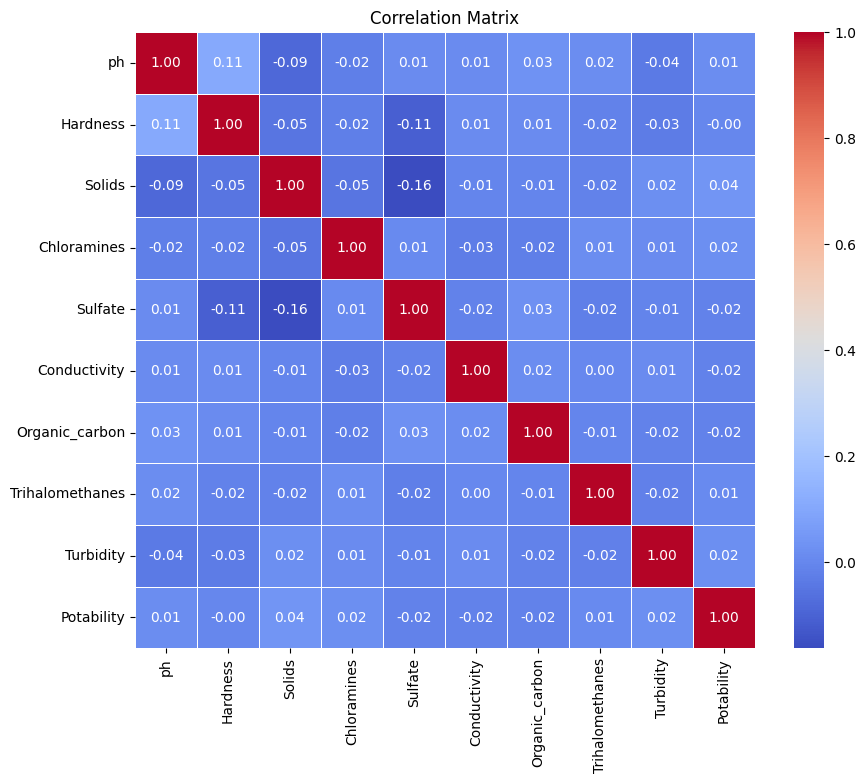

In [41]:




# Calculate correlation matrix
correlation_matrix = df1.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


<Figure size 1000x600 with 0 Axes>

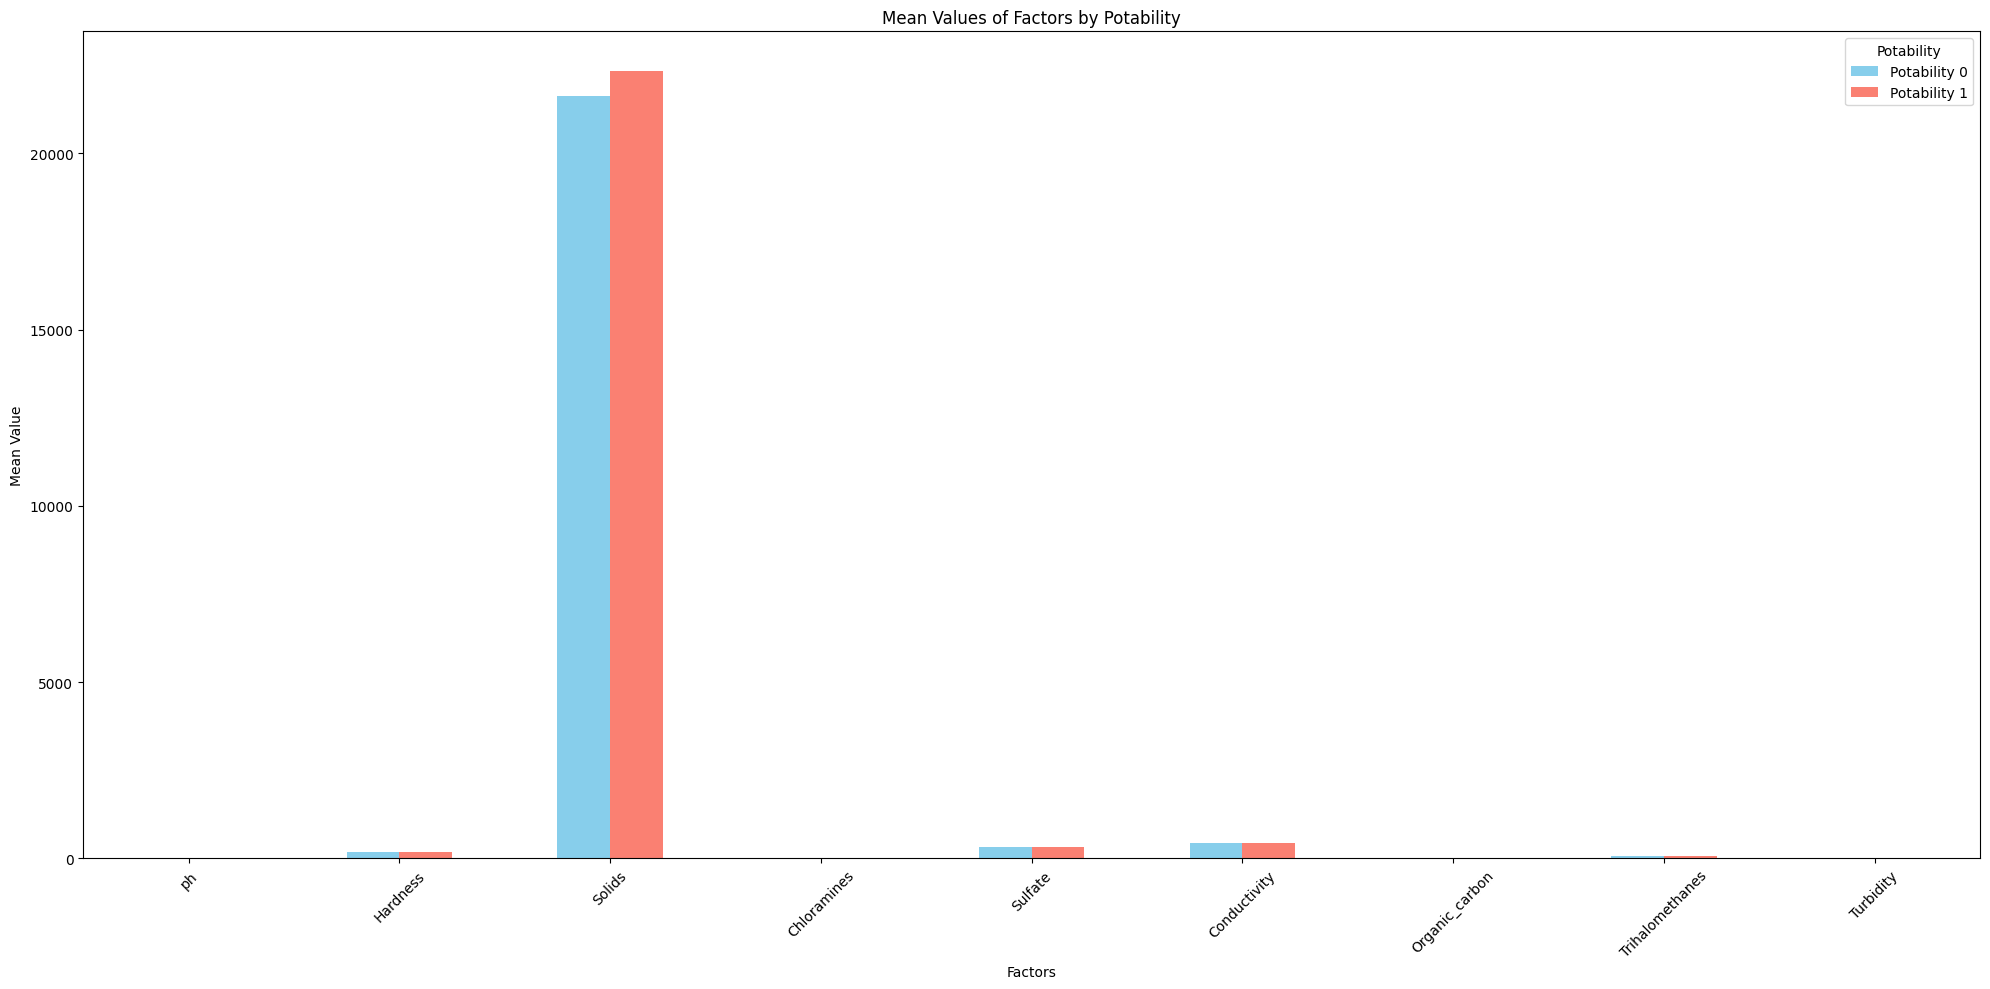

In [42]:



# Group the data by 'Potability' and calculate the mean for each factor
grouped_data = df1.groupby('Potability').mean()

# Transpose the grouped data to have factors as columns
grouped_data = grouped_data.T

# Plot the bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
grouped_data.plot(kind='bar', color=['skyblue', 'salmon'])  # Plot bars for both potability 0 and 1
plt.title('Mean Values of Factors by Potability')
plt.xlabel('Factors')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Potability', labels=['Potability 0', 'Potability 1'])  # Add legend
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


C:\Users\Shaminda Kanchana\AppData\Local\Temp\ipykernel_16052\2005950172.py:7: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



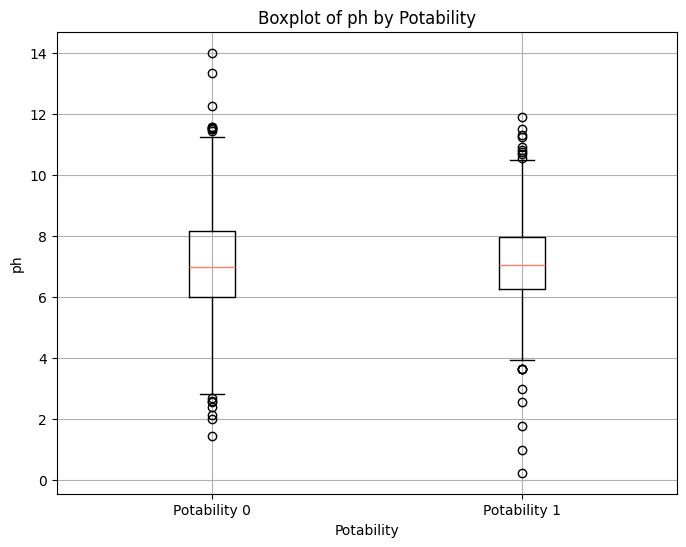

C:\Users\Shaminda Kanchana\AppData\Local\Temp\ipykernel_16052\2005950172.py:18: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



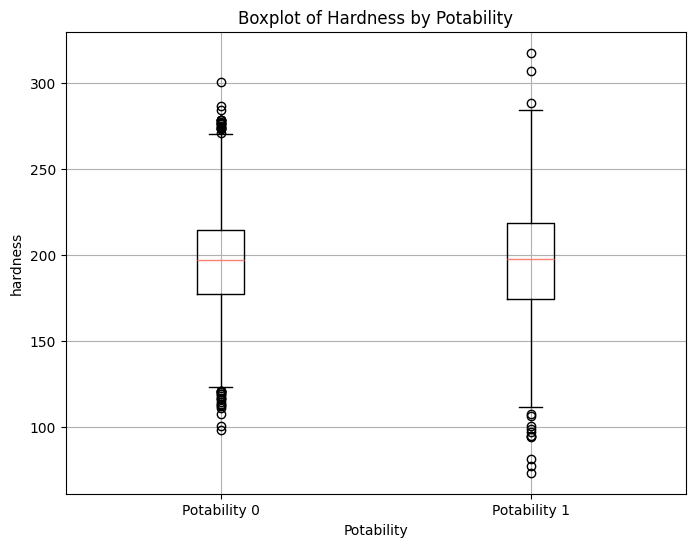

C:\Users\Shaminda Kanchana\AppData\Local\Temp\ipykernel_16052\2005950172.py:27: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



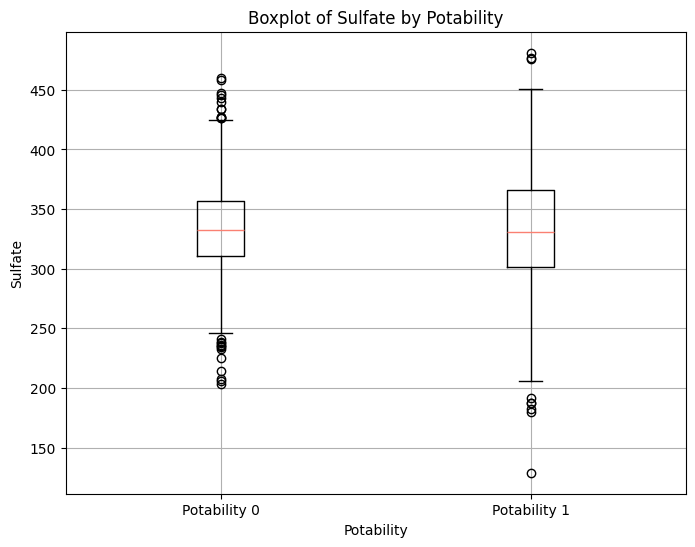

C:\Users\Shaminda Kanchana\AppData\Local\Temp\ipykernel_16052\2005950172.py:37: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



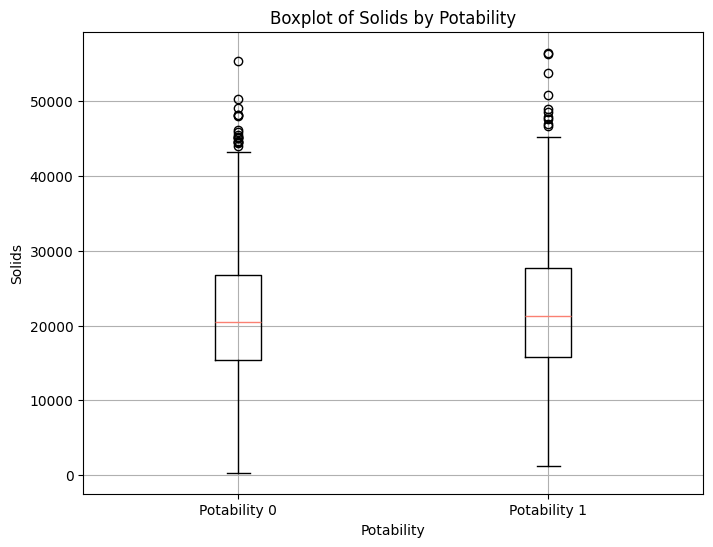

C:\Users\Shaminda Kanchana\AppData\Local\Temp\ipykernel_16052\2005950172.py:47: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



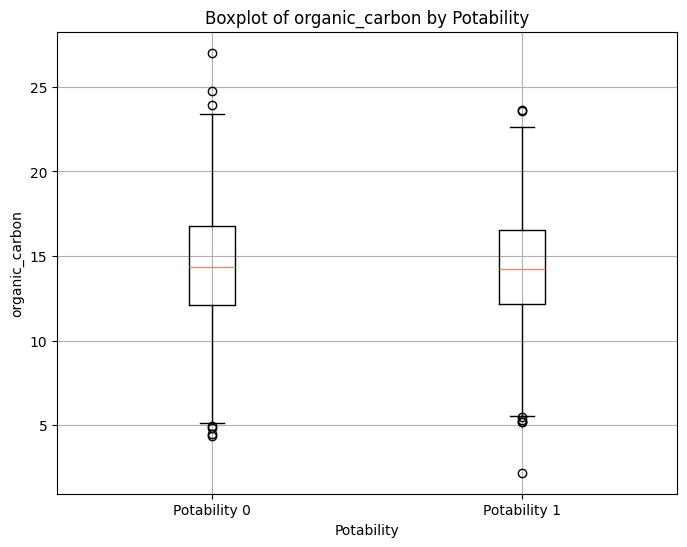

In [43]:


# Filter the data for potability 0 and 1
potability_0_data = df1[df1['Potability'] == 0]
potability_1_data = df1[df1['Potability'] == 1]

# Create boxplots for each potability group
plt.figure(figsize=(8, 6))  # Set the figure size
plt.boxplot([potability_0_data['ph'], potability_1_data['ph']], labels=['Potability 0', 'Potability 1'])
plt.title('Boxplot of ph by Potability')
plt.xlabel('Potability')
plt.ylabel('ph')
plt.grid(True)
plt.show()



# Create boxplots for each potability group
plt.figure(figsize=(8, 6))  # Set the figure size
plt.boxplot([potability_0_data['Hardness'], potability_1_data['Hardness']], labels=['Potability 0', 'Potability 1'])
plt.title('Boxplot of Hardness by Potability')
plt.xlabel('Potability')
plt.ylabel('hardness')
plt.grid(True)
plt.show()

# Create boxplots for each potability group
plt.figure(figsize=(8, 6))  # Set the figure size
plt.boxplot([potability_0_data['Sulfate'], potability_1_data['Sulfate']], labels=['Potability 0', 'Potability 1'])
plt.title('Boxplot of Sulfate by Potability')
plt.xlabel('Potability')
plt.ylabel('Sulfate')
plt.grid(True)
plt.show()


# Create boxplots for each potability group
plt.figure(figsize=(8, 6))  # Set the figure size
plt.boxplot([potability_0_data['Solids'], potability_1_data['Solids']], labels=['Potability 0', 'Potability 1'])
plt.title('Boxplot of Solids by Potability')
plt.xlabel('Potability')
plt.ylabel('Solids')
plt.grid(True)
plt.show()


# Create boxplots for each potability group
plt.figure(figsize=(8, 6))  # Set the figure size
plt.boxplot([potability_0_data['Organic_carbon'], potability_1_data['Organic_carbon']], labels=['Potability 0', 'Potability 1'])
plt.title('Boxplot of organic_carbon by Potability')
plt.xlabel('Potability')
plt.ylabel('organic_carbon')
plt.grid(True)
plt.show()


In [48]:
df1.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2011.000000  2011.000000   2011.000000  2011.000000  2011.000000   
mean      7.086002   195.968026  21917.441243     7.134291   333.224664   
std       1.573394    32.635028   8642.239802     1.584821    41.205226   
min       0.230000    73.490000    320.940000     1.390000   129.000000   
25%       6.090000   176.745000  15615.665000     6.140000   307.630000   
50%       7.030000   197.190000  20933.510000     7.140000   332.230000   
75%       8.050000   216.440000  27182.585000     8.110000   359.330000   
max      14.000000   317.340000  56488.670000    13.130000   481.030000   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   2011.000000     2011.000000      2011.000000  2011.000000  2011.000000  
mean     426.526474       14.357683        66.400855     3.969657     0.403282  
std       80.712672        3.325022        16.077042     0.780294     0.490678  
min      201.620000        2.200000         8.580000     1.450000     0.000000  
25%      366.680000       12.125000        55.955000     3.440000     0.000000  
50%      423.460000       14.320000        66.540000     3.970000     0.000000  
75%      482.370000       16.680000        77.295000     4.515000     1.000000  
max      753.340000       27.010000       124.000000     6.490000     1.000000

<Axes: xlabel='ph'>

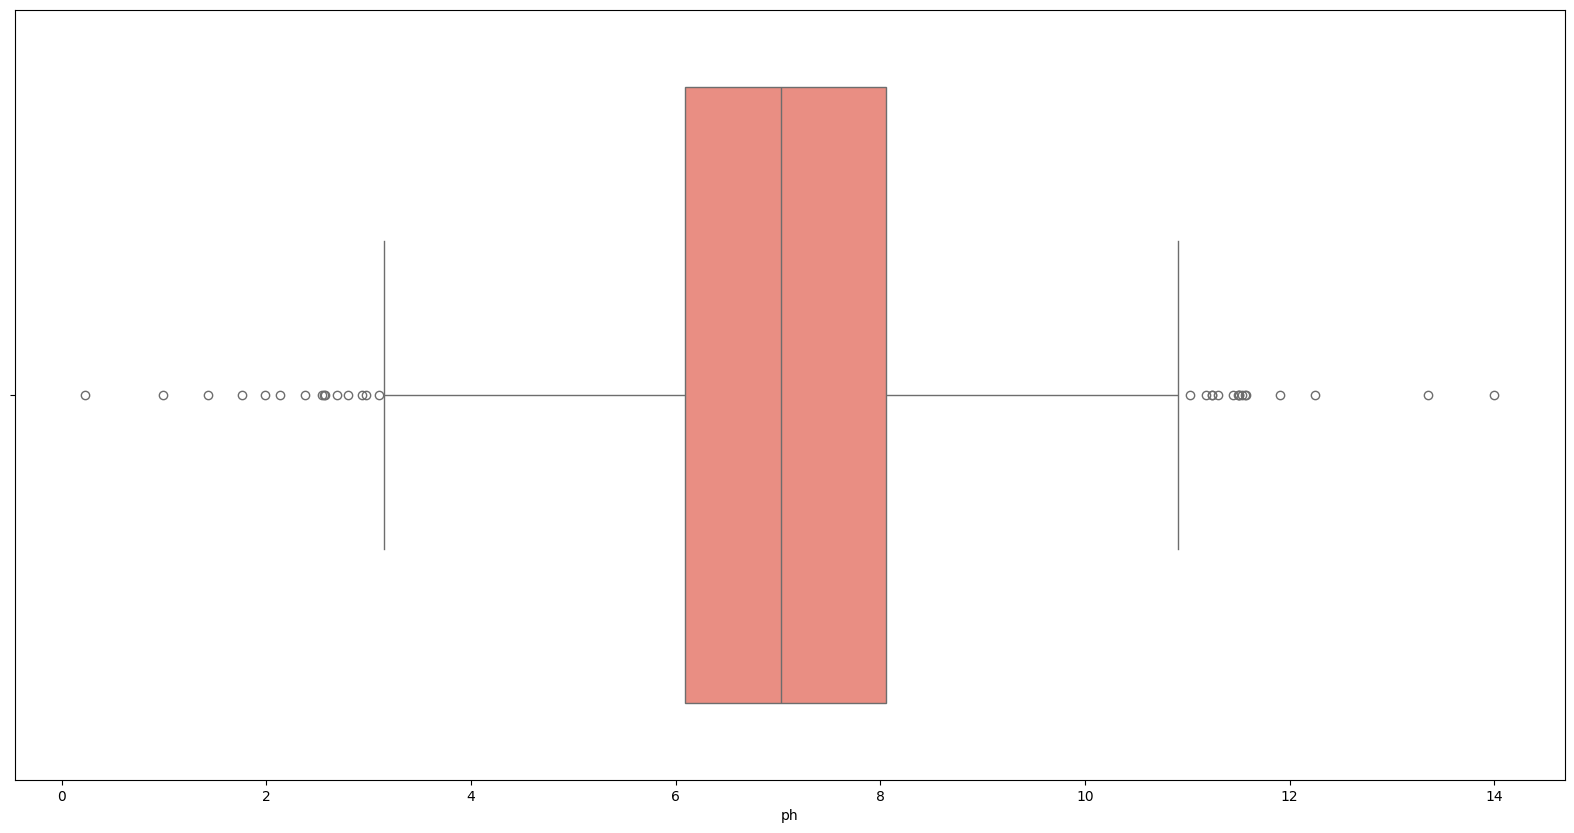

In [55]:
sns.boxplot(data=df1,x="ph")



In [60]:
q1=df1['ph'].quantile(0.25)
q3=df1['ph'].quantile(0.75)
iqr=q3-q1
q1,q3,iqr
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
print("upper limit",upper_limit)
print("lower limit",lower_limit)

upper limit 10.990000000000002
lower limit 3.1499999999999986


In [68]:
df1['ph'].describe()

count    2011.000000
mean        7.086002
std         1.573394
min         0.230000
25%         6.090000
50%         7.030000
75%         8.050000
max        14.000000
Name: ph, dtype: float64

In [79]:
#Capping-change the outlier values to upper or lower limit values
new_df1=df1.copy()
new_df1.loc[(new_df1['ph']>upper_limit),'ph']=upper_limit
new_df1.loc[(new_df1['ph']<lower_limit),'ph']=lower_limit

In [80]:
new_df1.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2011.000000  2011.000000   2011.000000  2011.000000  2011.000000   
mean      7.086962   195.968026  21917.441243     7.134291   333.224664   
std       1.533513    32.635028   8642.239802     1.584821    41.205226   
min       3.150000    73.490000    320.940000     1.390000   129.000000   
25%       6.090000   176.745000  15615.665000     6.140000   307.630000   
50%       7.030000   197.190000  20933.510000     7.140000   332.230000   
75%       8.050000   216.440000  27182.585000     8.110000   359.330000   
max      10.990000   317.340000  56488.670000    13.130000   481.030000   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   2011.000000     2011.000000      2011.000000  2011.000000  2011.000000  
mean     426.526474       14.357683        66.400855     3.969657     0.403282  
std       80.712672        3.325022        16.077042     0.780294     0.490678  
min      201.620000        2.200000         8.580000     1.450000     0.000000  
25%      366.680000       12.125000        55.955000     3.440000     0.000000  
50%      423.460000       14.320000        66.540000     3.970000     0.000000  
75%      482.370000       16.680000        77.295000     4.515000     1.000000  
max      753.340000       27.010000       124.000000     6.490000     1.000000

<Axes: xlabel='ph', ylabel='Count'>

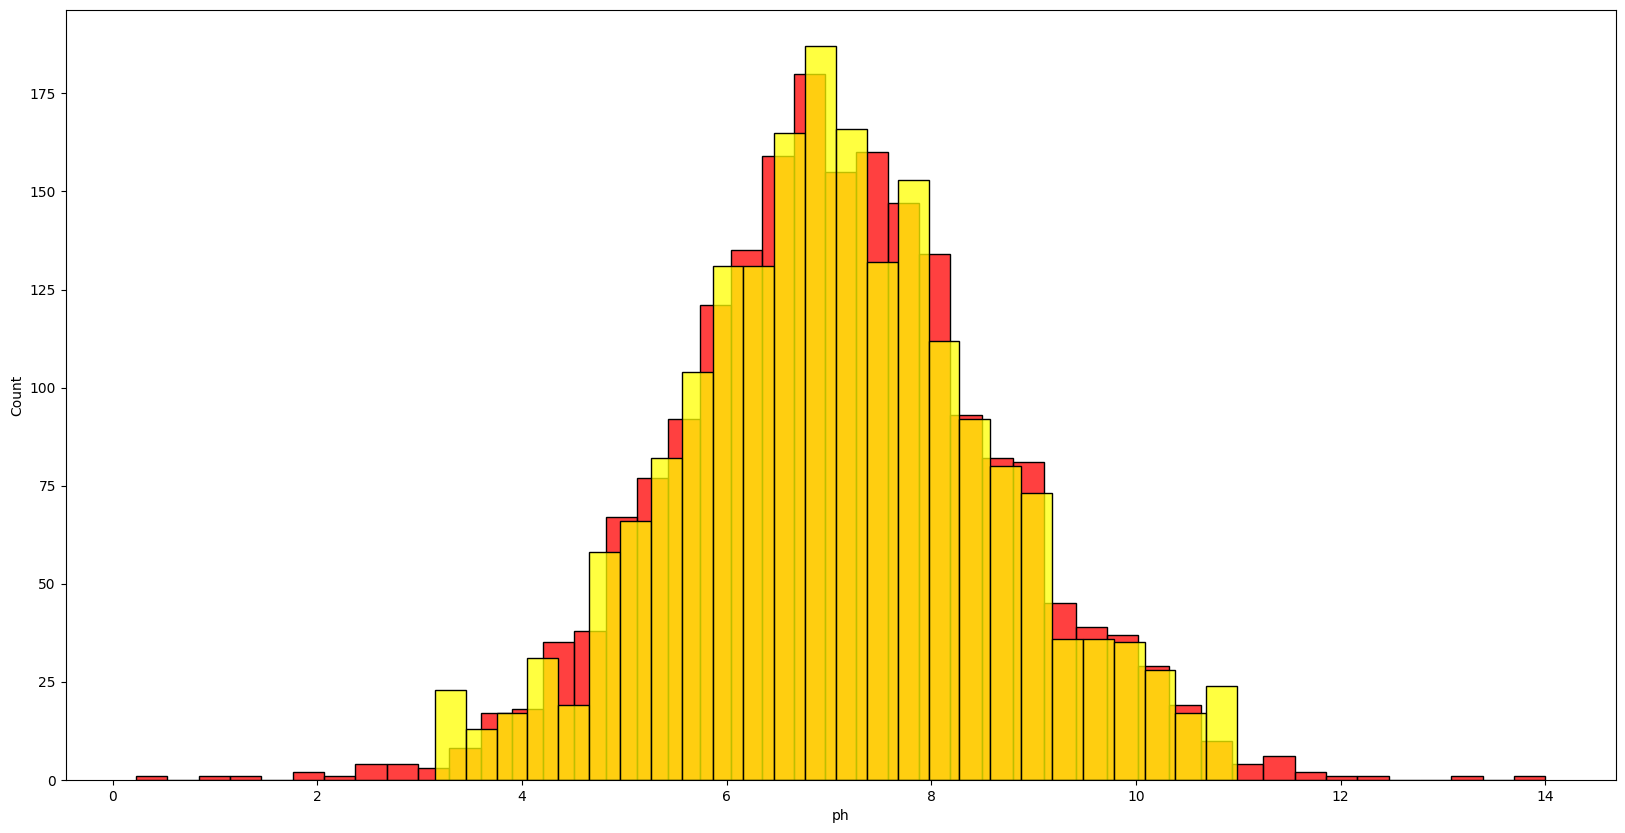

In [85]:

sns.histplot(data=df1,x="ph",color="red",)
sns.histplot(data=new_df1,x="ph",color="yellow")

In [87]:
new_df1['ph'].var()

np.float64(2.351663550274486)

<Axes: xlabel='Hardness'>

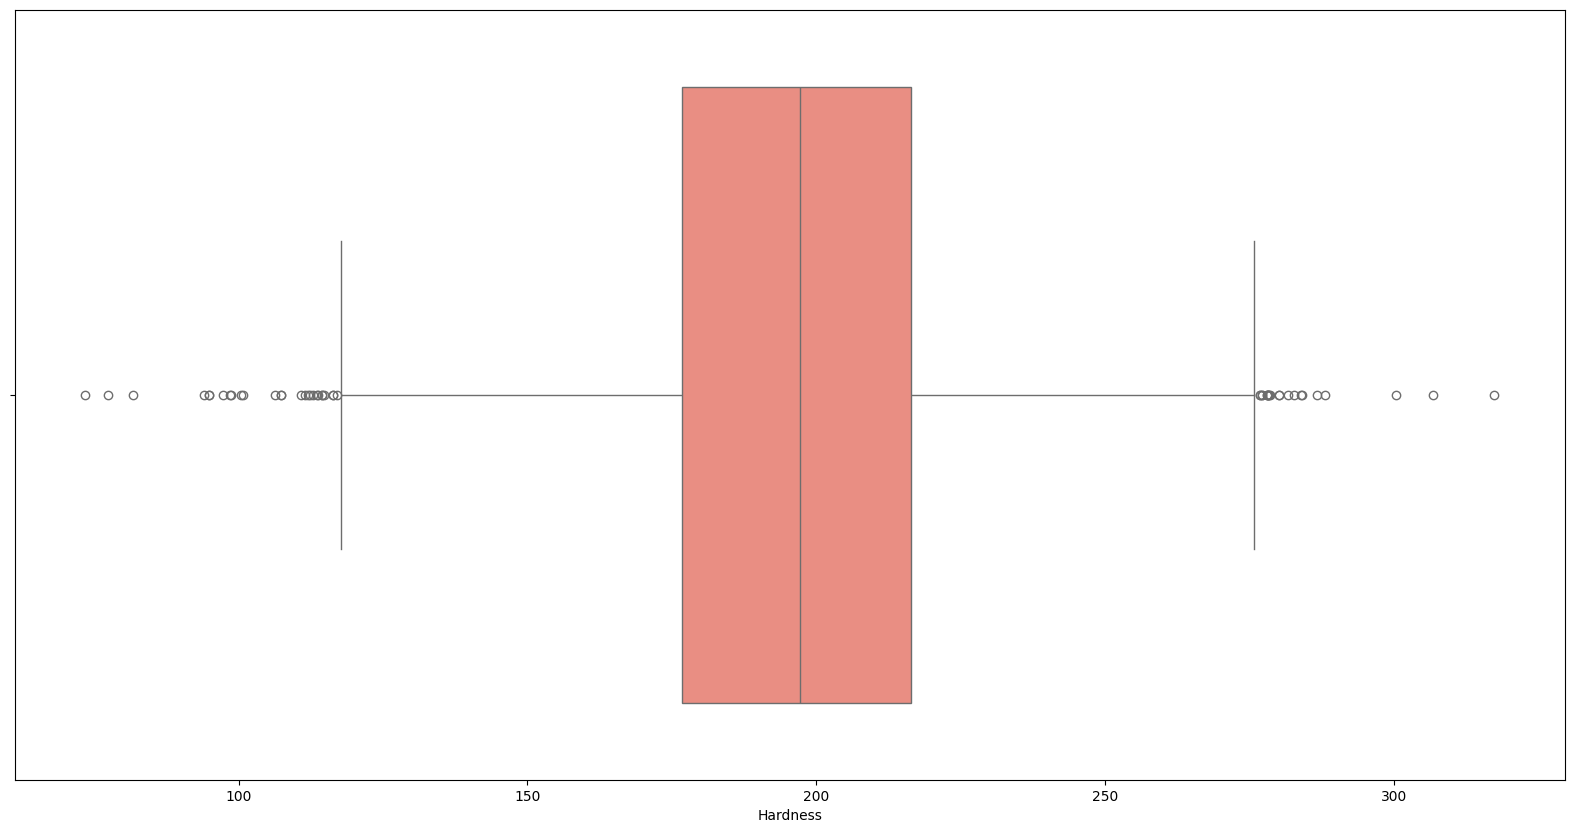

In [103]:
sns.boxplot(data=df1,x="Hardness")

In [90]:
q1=df1['Hardness'].quantile(0.25)
q3=df1['Hardness'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
print("Upper limit is ",upper_limit)
print("Lower limit is ",lower_limit)

Upper limit is  275.98249999999996
Lower limit is  117.20250000000001


In [92]:
df1['Hardness'].describe()

count    2011.000000
mean      195.968026
std        32.635028
min        73.490000
25%       176.745000
50%       197.190000
75%       216.440000
max       317.340000
Name: Hardness, dtype: float64

In [93]:
new_df1.loc[(new_df1['Hardness']>upper_limit),'Hardness']=upper_limit
new_df1.loc[(new_df1['Hardness']<lower_limit),'Hardness']=lower_limit

In [96]:
new_df1['Hardness'].describe().round(3)

count    2011.000
mean      196.056
std        31.899
min       117.203
25%       176.745
50%       197.190
75%       216.440
max       275.982
Name: Hardness, dtype: float64

<Axes: xlabel='Hardness'>

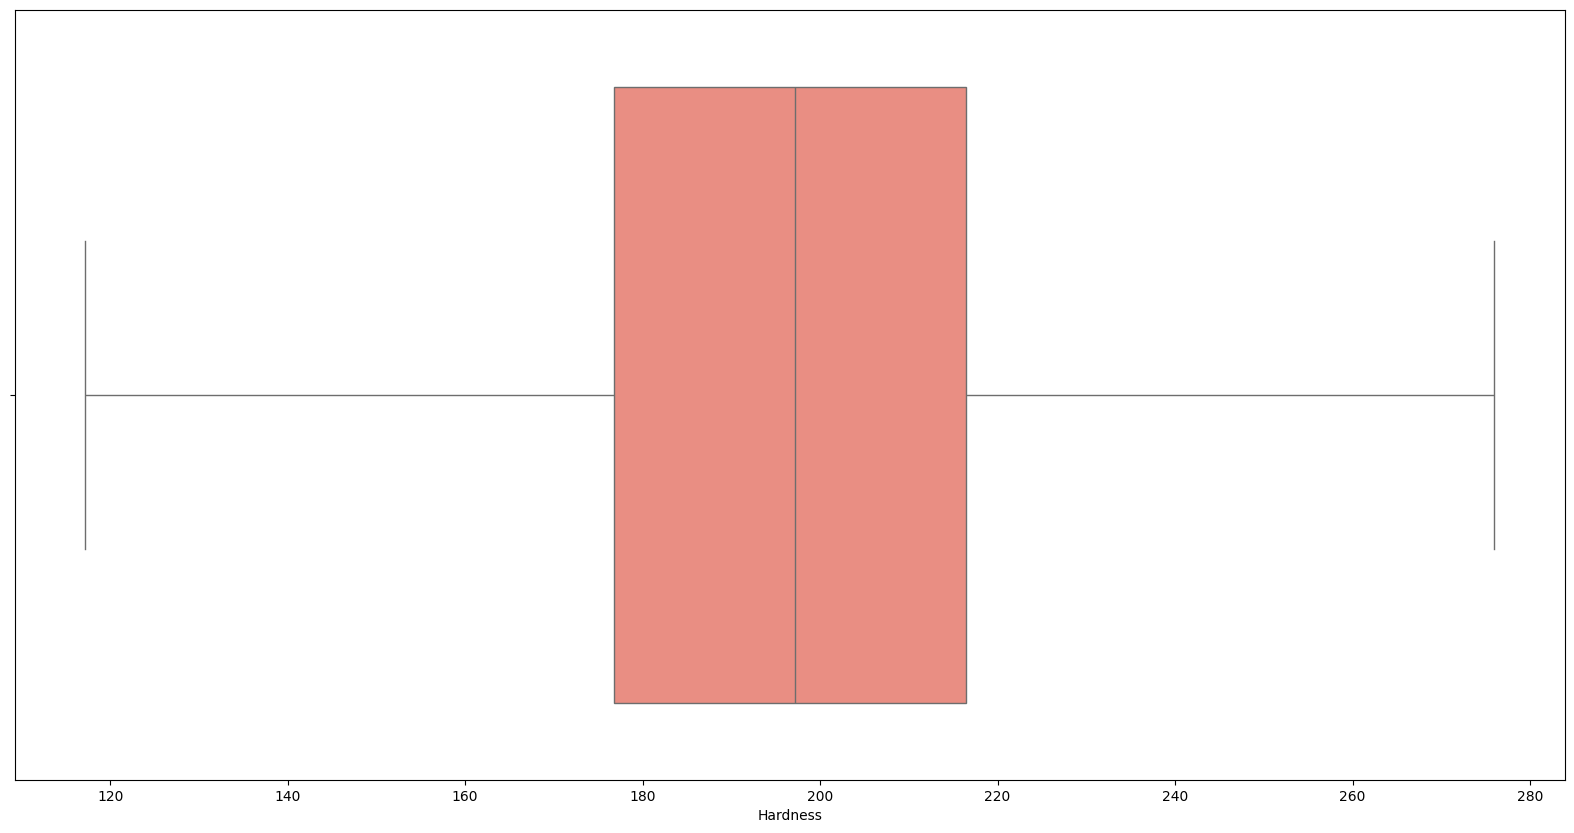

In [105]:
sns.boxplot(data=new_df1,x="Hardness")

<Axes: xlabel='Hardness', ylabel='Count'>

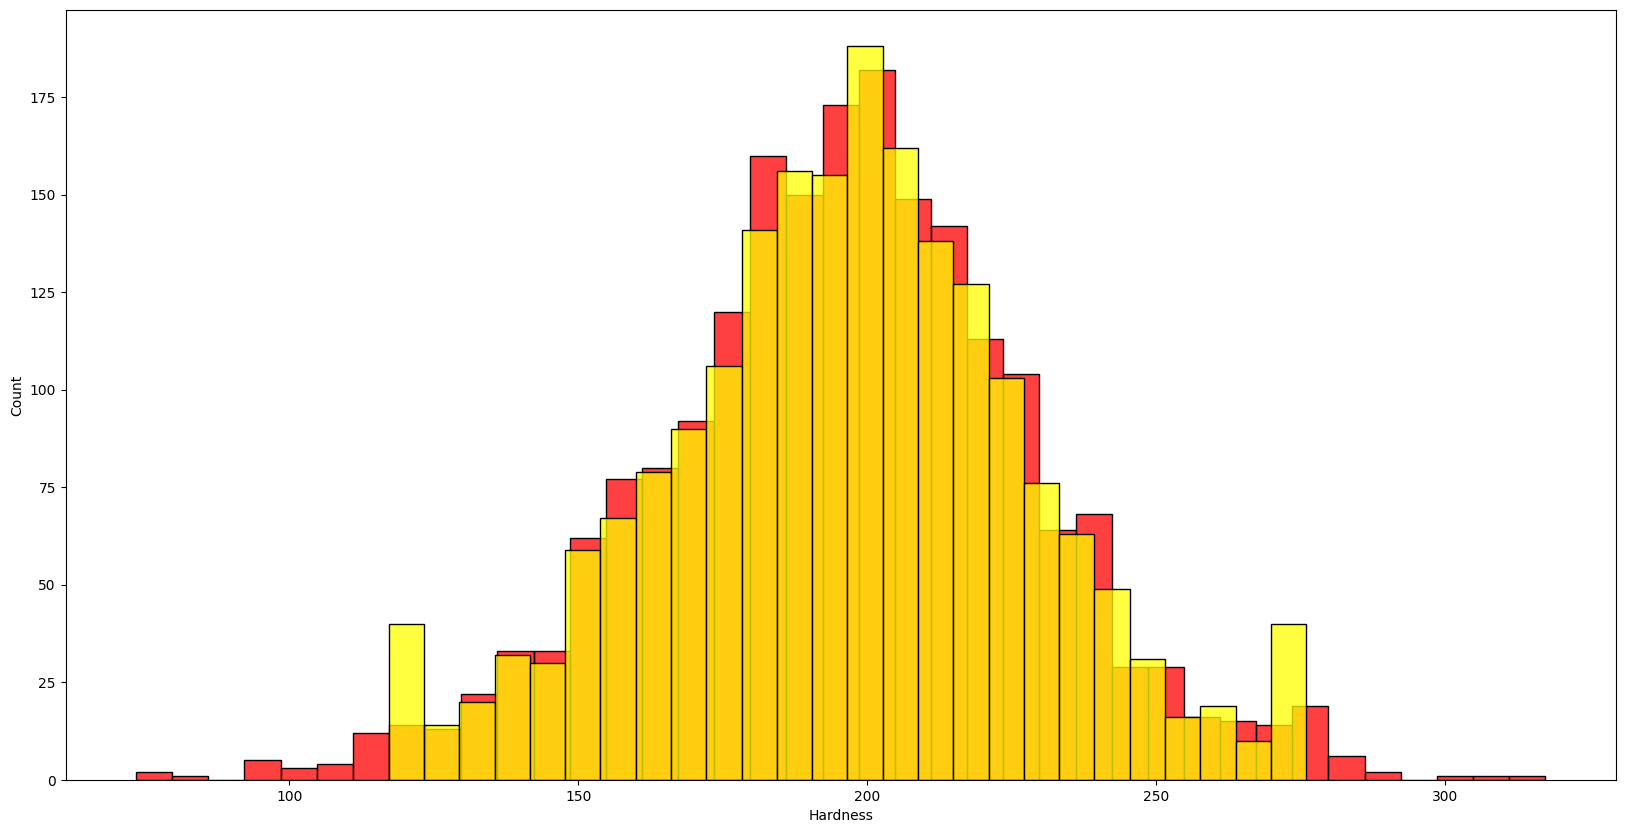

In [107]:
sns.histplot(data=df1,x="Hardness",color="red")
sns.histplot(data=new_df1,x="Hardness",color="yellow")

<Axes: xlabel='Solids'>

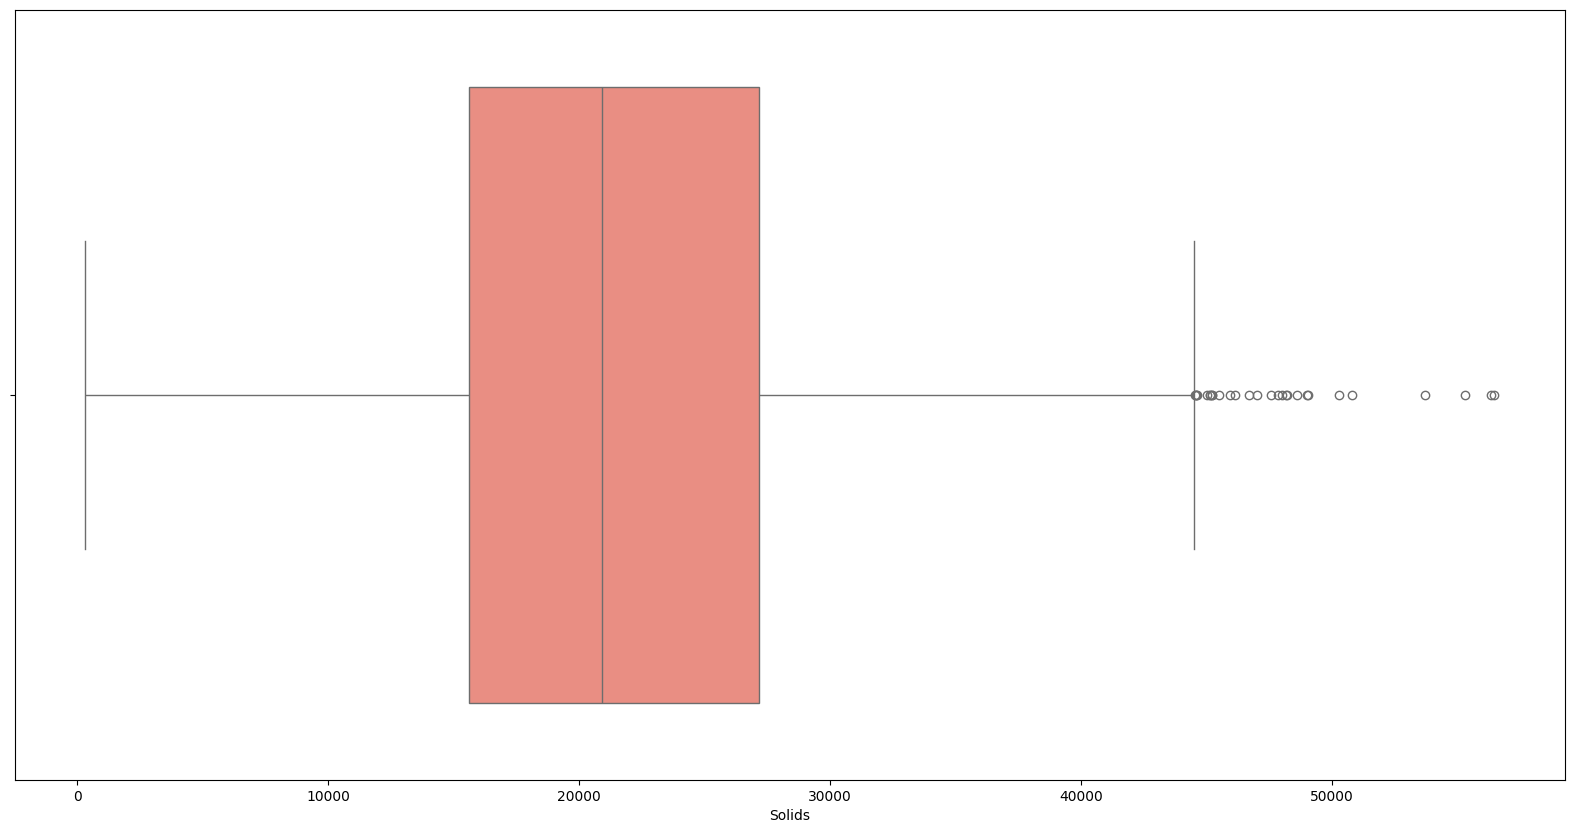

In [109]:
sns.boxplot(data=df1,x="Solids")

In [113]:

q1=df1['Solids'].quantile(.25)
q3=df1['Solids'].quantile(.75)
iqr=q3-q1
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 44532.965
Lower limit -1734.7149999999965


In [114]:
new_df1.loc[(new_df1['Solids']>upper_limit),'Solids']=upper_limit
new_df1.loc[(new_df1['Solids']<lower_limit),'Solids']=lower_limit

<Axes: xlabel='Solids'>

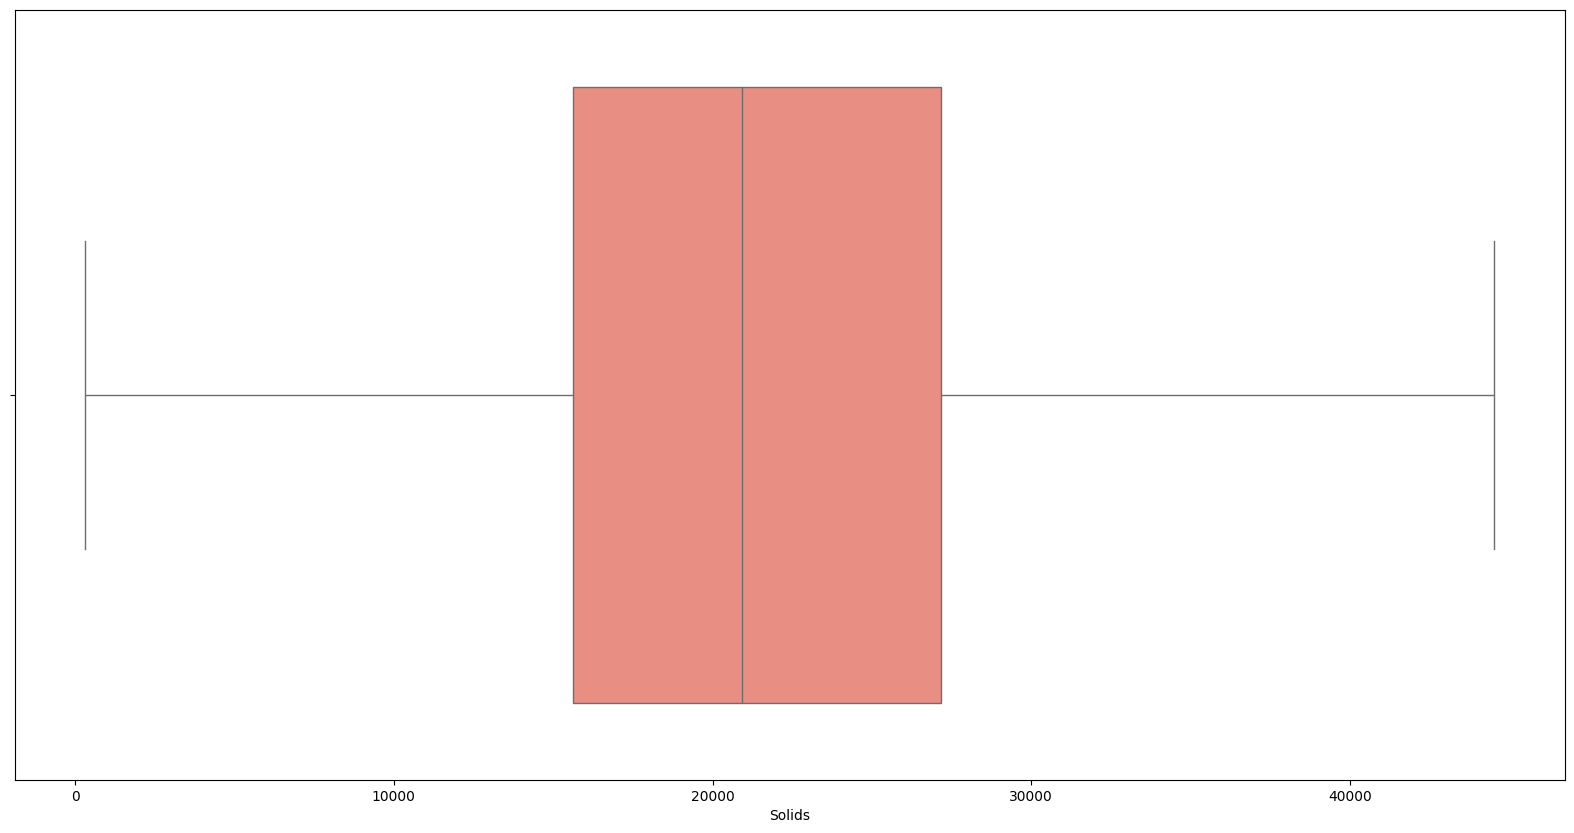

In [115]:
sns.boxplot(data=new_df1,x="Solids")

<Axes: xlabel='Solids', ylabel='Count'>

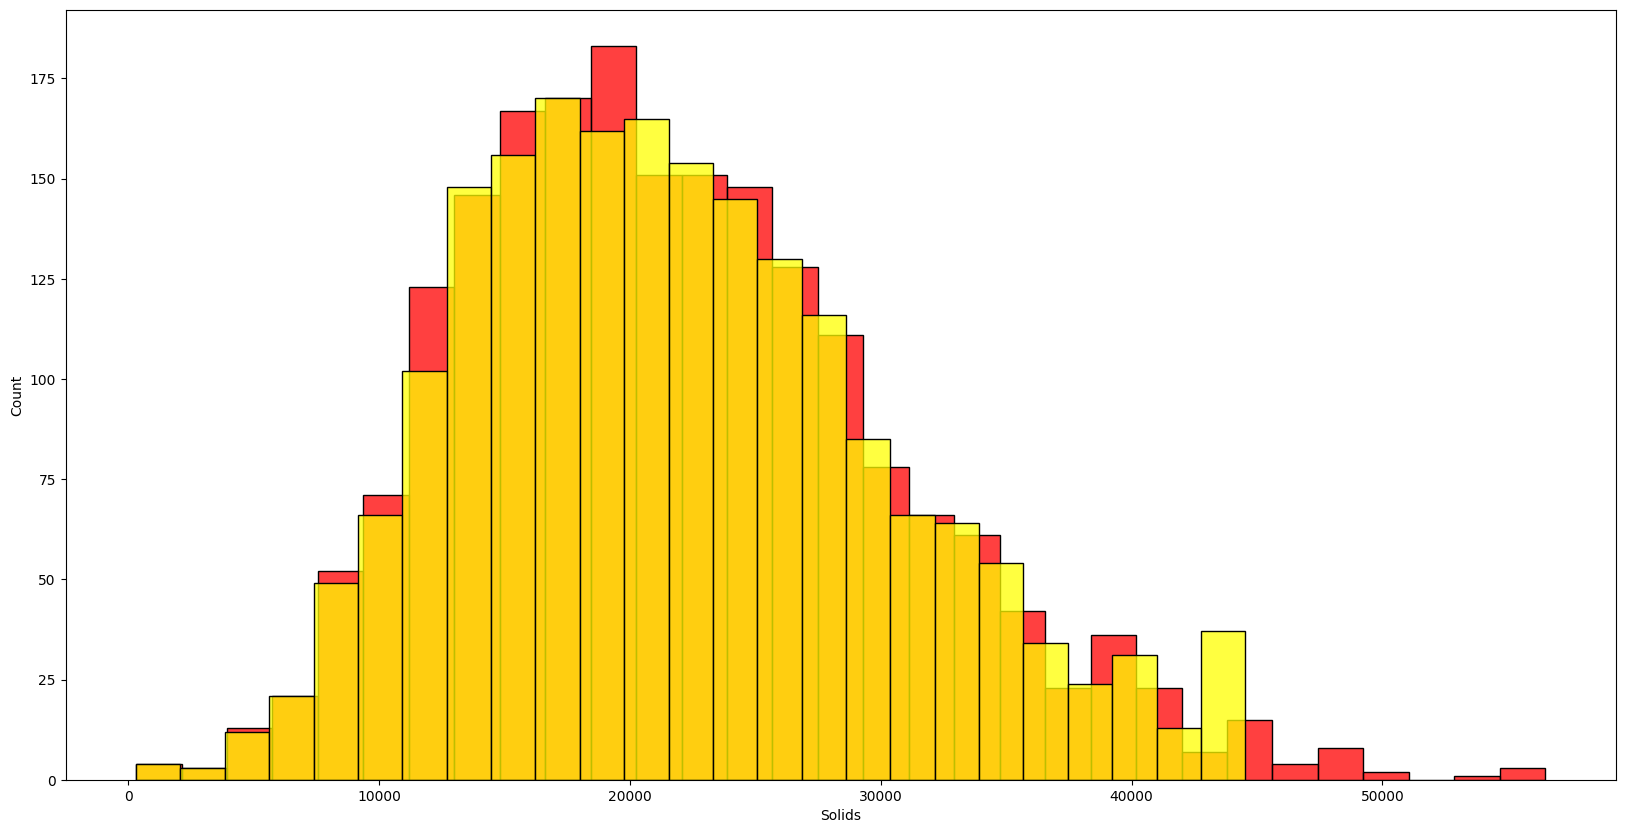

In [116]:
sns.histplot(data=df1,x="Solids",color="red")
sns.histplot(data=new_df1,x="Solids",color="yellow")

<Axes: xlabel='Chloramines'>

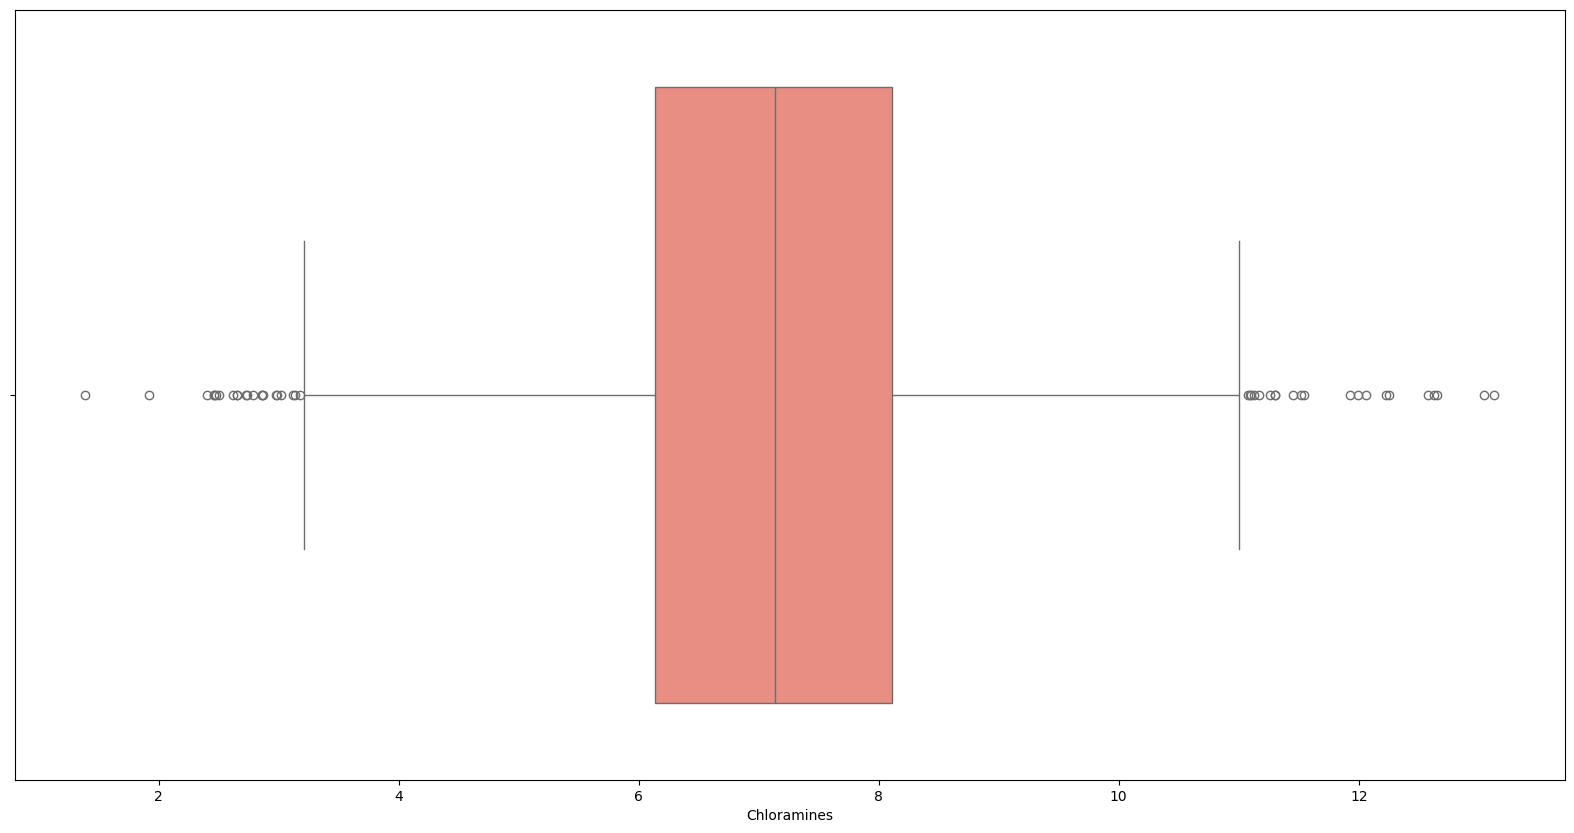

In [119]:
sns.boxplot(data=df1,x="Chloramines")

In [120]:
q1=df1['Chloramines'].quantile(.25)
q3=df1['Chloramines'].quantile(.75)
iqr=q3-q1
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 11.065
Lower limit 3.185


In [121]:
new_df1.loc[(new_df1['Chloramines']>upper_limit),'Chloramines']=upper_limit
new_df1.loc[(new_df1['Chloramines']<lower_limit),'Chloramines']=lower_limit

<Axes: xlabel='Chloramines'>

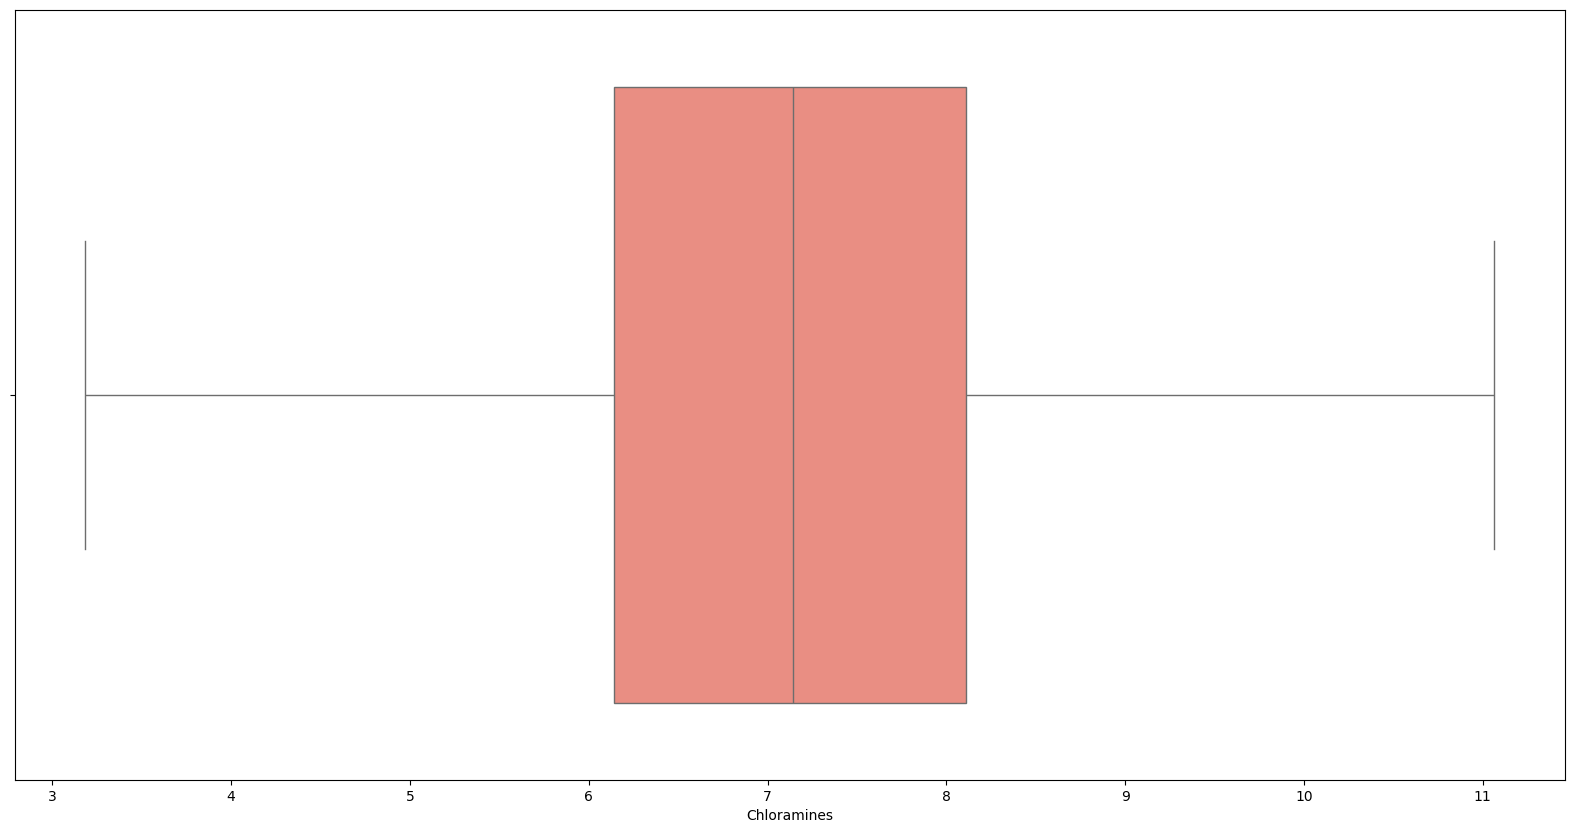

In [122]:
sns.boxplot(data=new_df1,x="Chloramines")

<Axes: xlabel='Chloramines', ylabel='Count'>

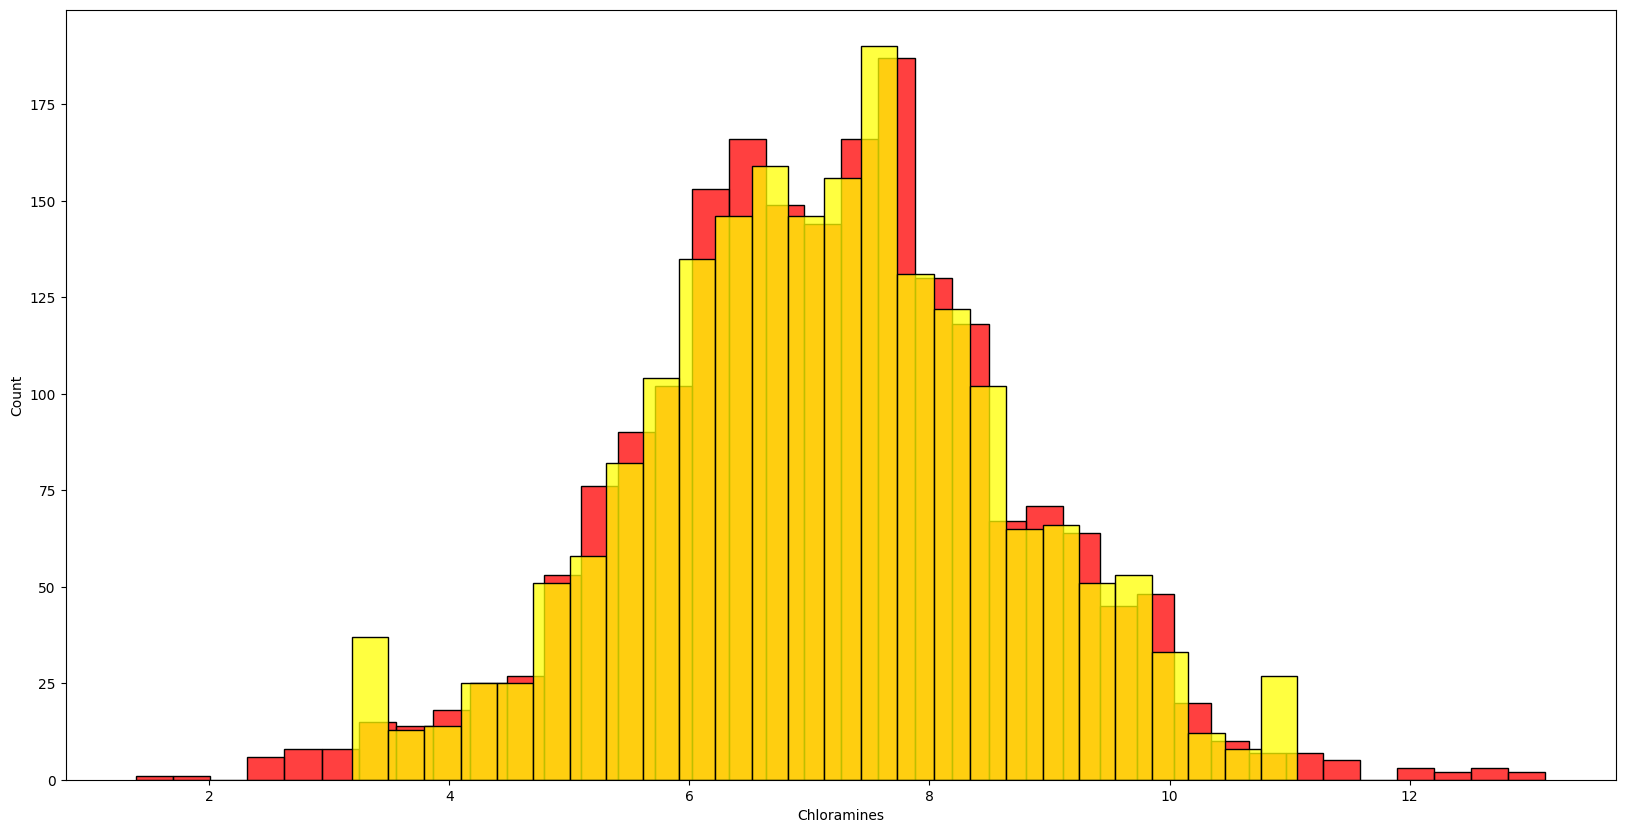

In [123]:
sns.histplot(data=df1,x="Chloramines",color="red")
sns.histplot(data=new_df1,x="Chloramines",color="yellow")

In [124]:
df1.head()

ph  Hardness    Solids  Chloramines  Sulfate  Conductivity  \
3   8.32    214.37  22018.42         8.06   356.89        363.27   
4   9.09    181.10  17978.99         6.55   310.14        398.41   
5   5.58    188.31  28748.69         7.54   326.68        280.47   
6  10.22    248.07  28749.72         7.51   393.66        283.65   
7   8.64    203.36  13672.09         4.56   303.31        474.61   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
3           18.44           100.34       4.63           0  
4           11.56            32.00       4.08           0  
5            8.40            54.92       2.56           0  
6           13.79            84.60       2.67           0  
7           12.36            62.80       4.40           0

<Axes: xlabel='Conductivity'>

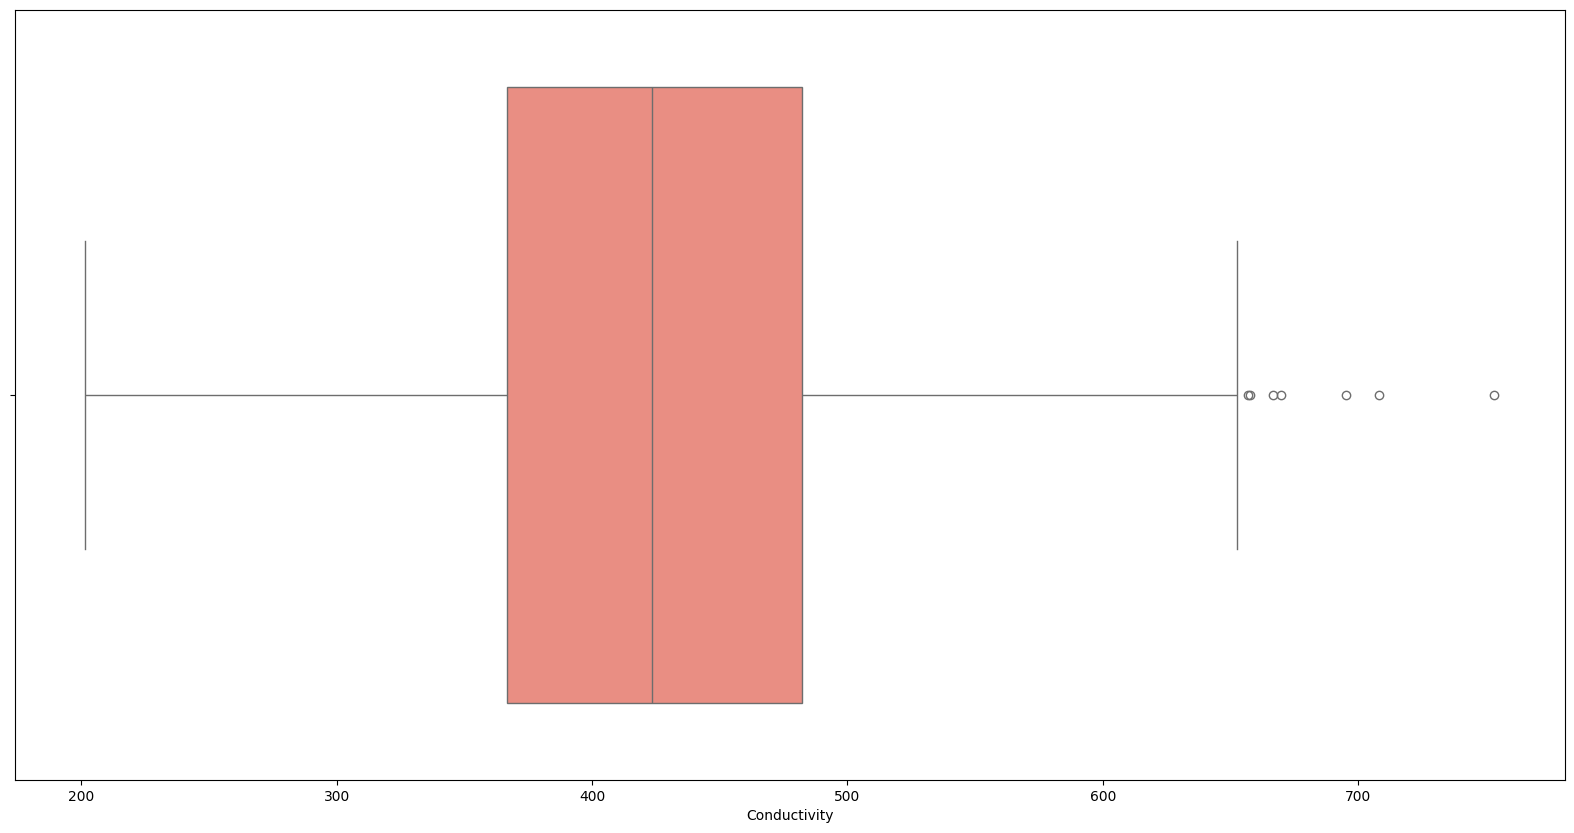

In [125]:
sns.boxplot(data=new_df1,x="Conductivity")


In [126]:
q1=df1['Conductivity'].quantile(.25)
q3=df1['Conductivity'].quantile(.75)
iqr=q3-q1
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 655.905
Lower limit 193.145


In [128]:
new_df1.loc[(new_df1['Conductivity']>upper_limit),'Conductivity']=upper_limit
new_df1.loc[(new_df1['Conductivity']<lower_limit),'Conductivity']=lower_limit

<Axes: xlabel='Conductivity'>

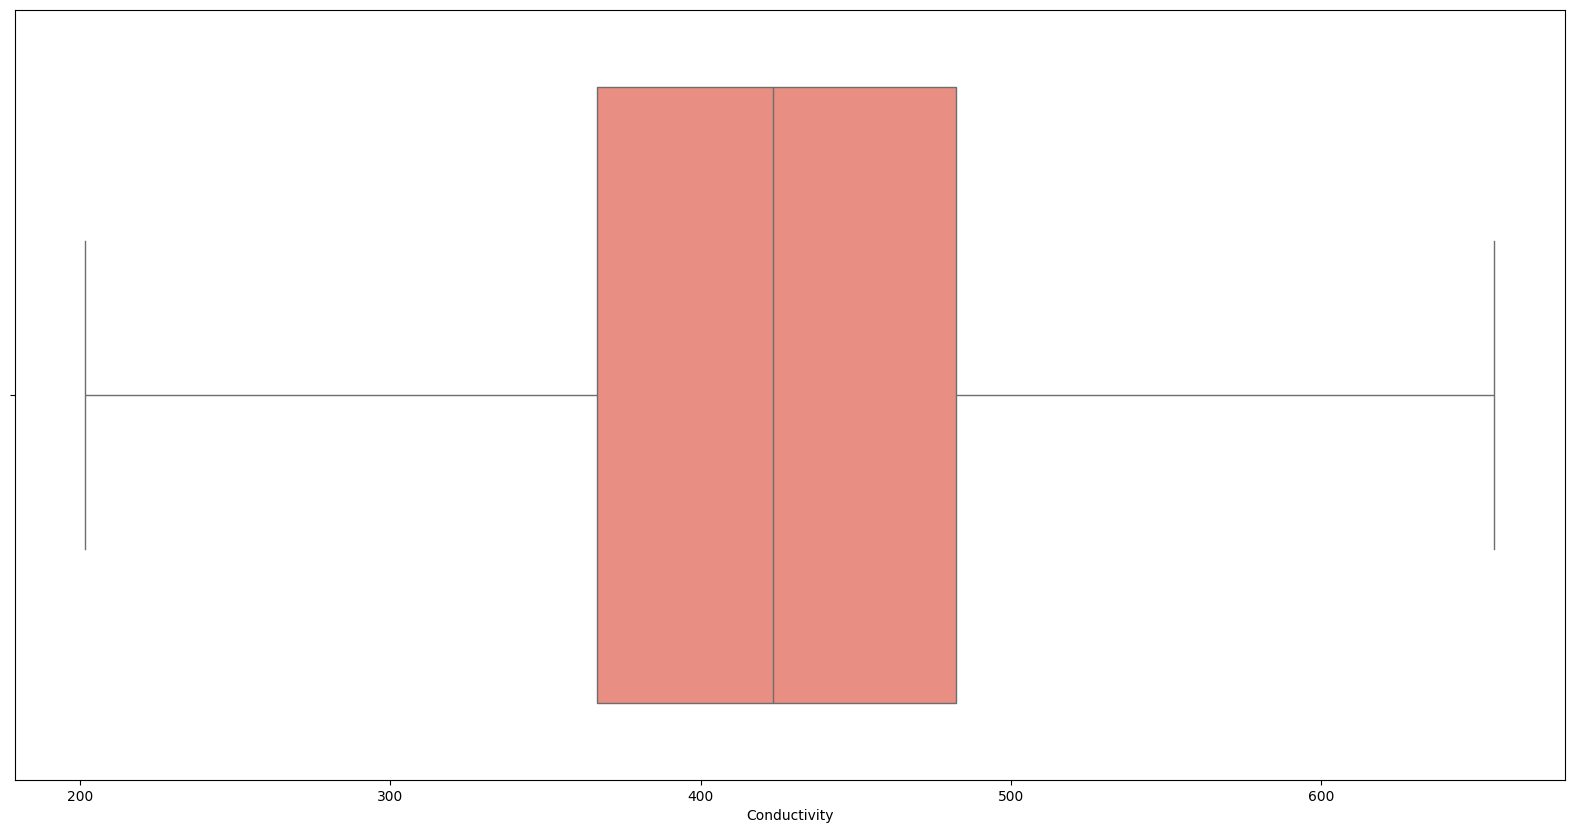

In [130]:
sns.boxplot(data=new_df1,x="Conductivity")

<Axes: xlabel='Conductivity', ylabel='Count'>

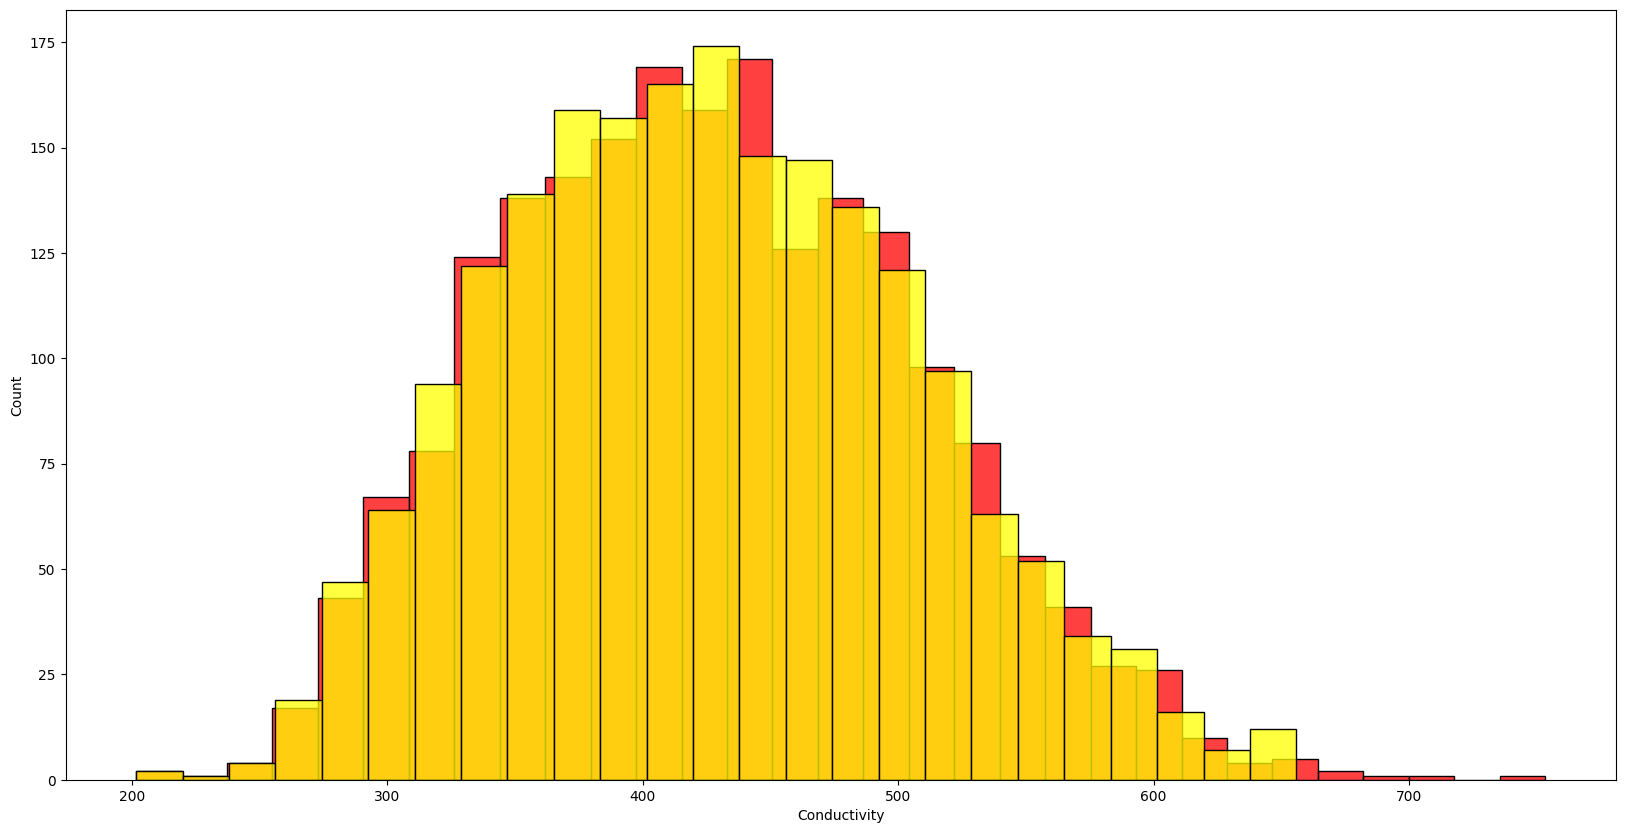

In [129]:
sns.histplot(data=df1,x="Conductivity",color="red")
sns.histplot(data=new_df1,x="Conductivity",color="yellow")

<Axes: xlabel='Organic_carbon'>

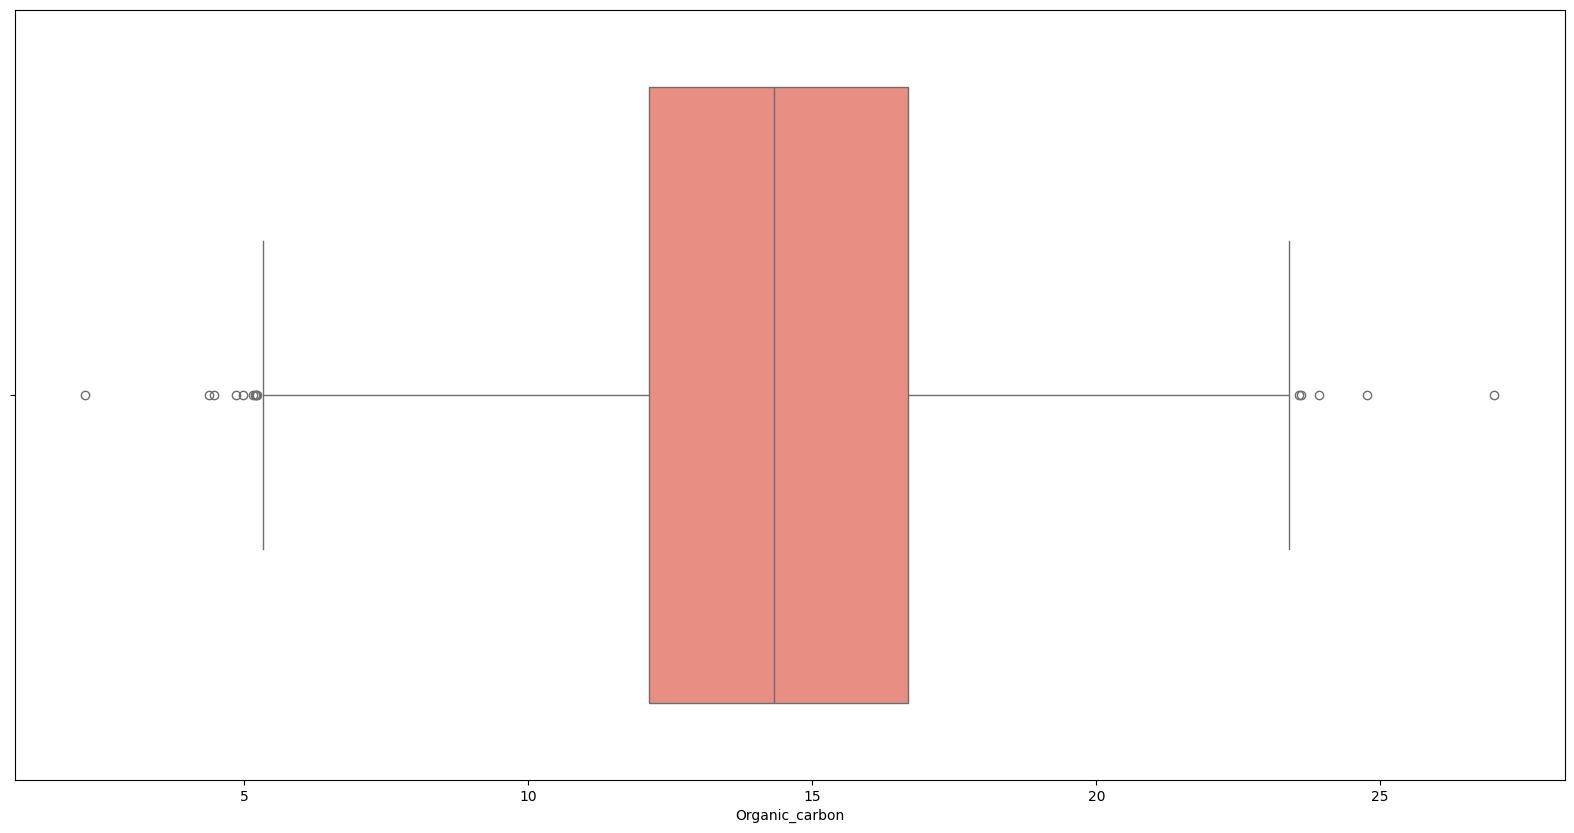

In [134]:
sns.boxplot(data=df1,x="Organic_carbon")

In [135]:
df1.head(1)

ph  Hardness    Solids  Chloramines  Sulfate  Conductivity  \
3  8.32    214.37  22018.42         8.06   356.89        363.27   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
3           18.44           100.34       4.63           0

In [137]:
q1=df1['Organic_carbon'].quantile(.25)
q3=df1['Organic_carbon'].quantile(.75)
iqr=q3-q1
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

new_df1.loc[(new_df1['Organic_carbon']>upper_limit),'Organic_carbon']=upper_limit
new_df1.loc[(new_df1['Organic_carbon']<lower_limit),'Organic_carbon']=lower_limit


Upper limit 23.5125
Lower limit 5.2925


<Axes: xlabel='Organic_carbon'>

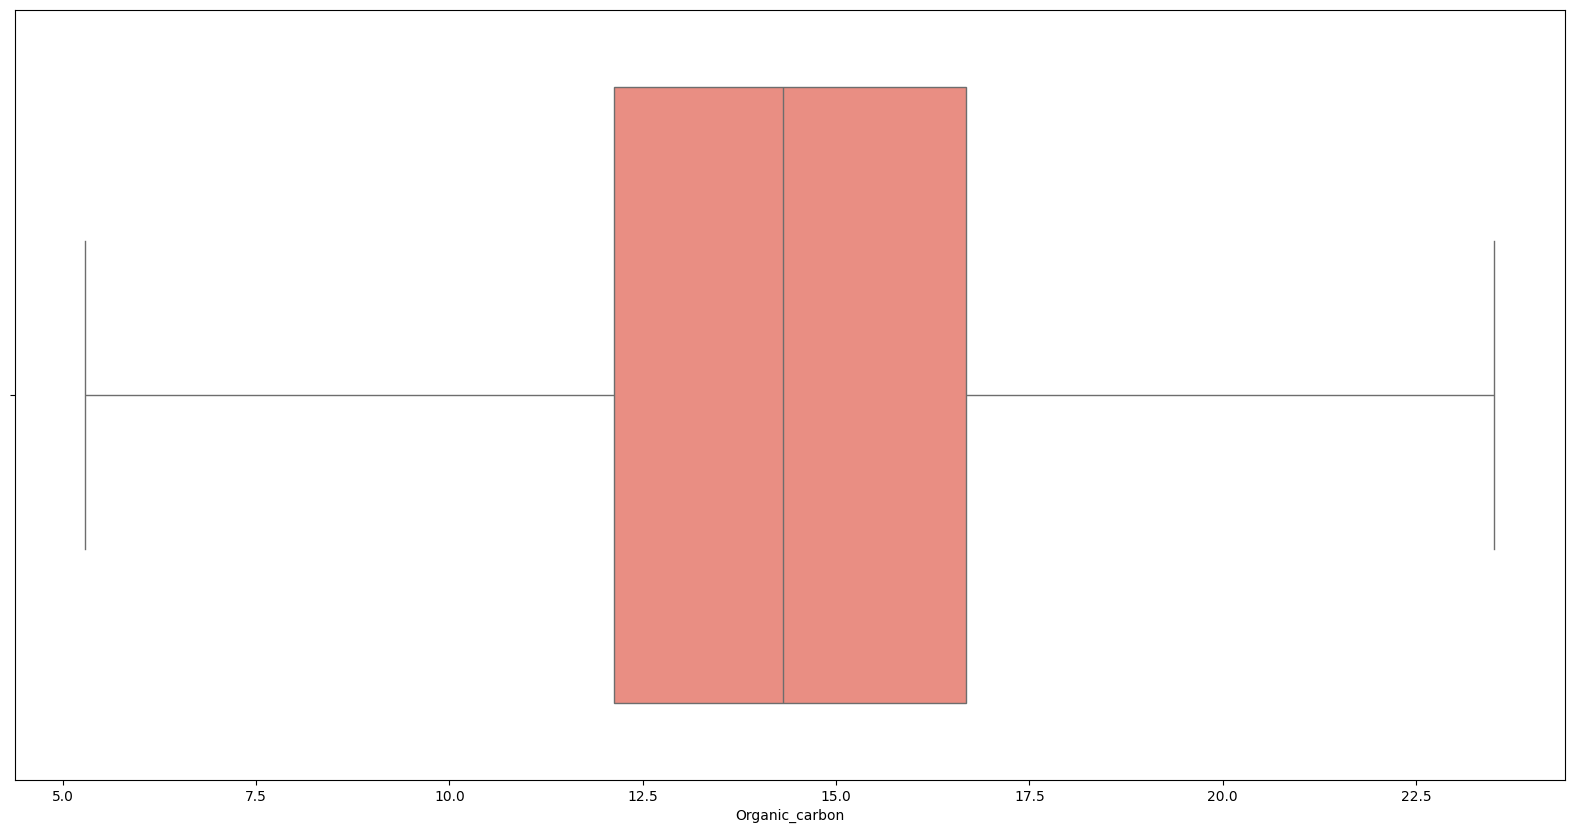

In [138]:
sns.boxplot(data=new_df1,x="Organic_carbon")

<Axes: xlabel='Organic_carbon', ylabel='Count'>

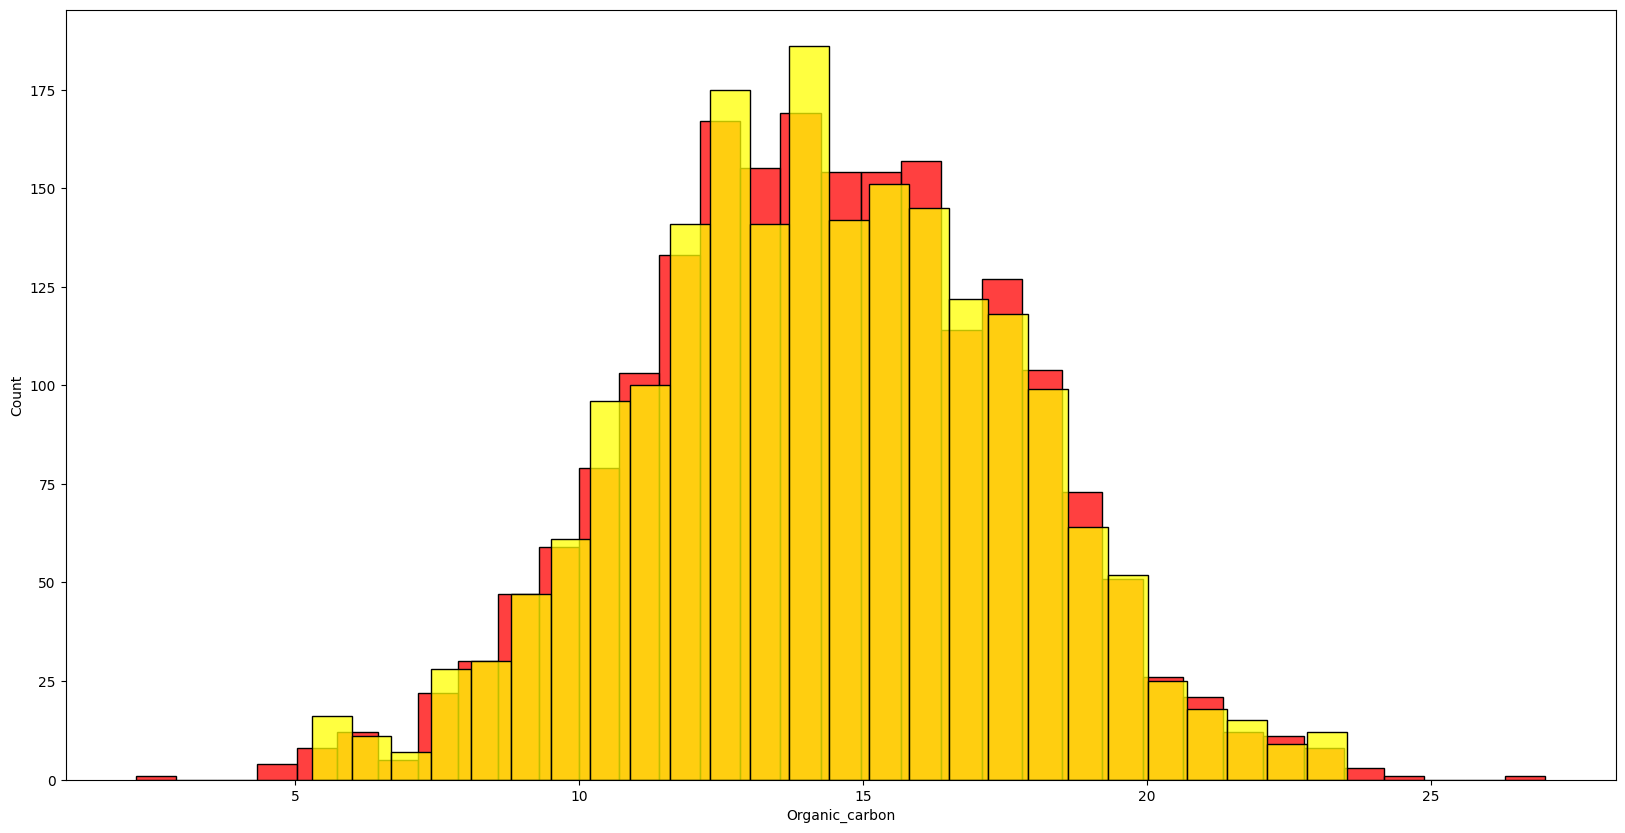

In [139]:
sns.histplot(data=df1,x="Organic_carbon",color="red")
sns.histplot(data=new_df1,x="Organic_carbon",color="yellow")

In [140]:
df1.head(1)

ph  Hardness    Solids  Chloramines  Sulfate  Conductivity  \
3  8.32    214.37  22018.42         8.06   356.89        363.27   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
3           18.44           100.34       4.63           0

<Axes: xlabel='Trihalomethanes'>

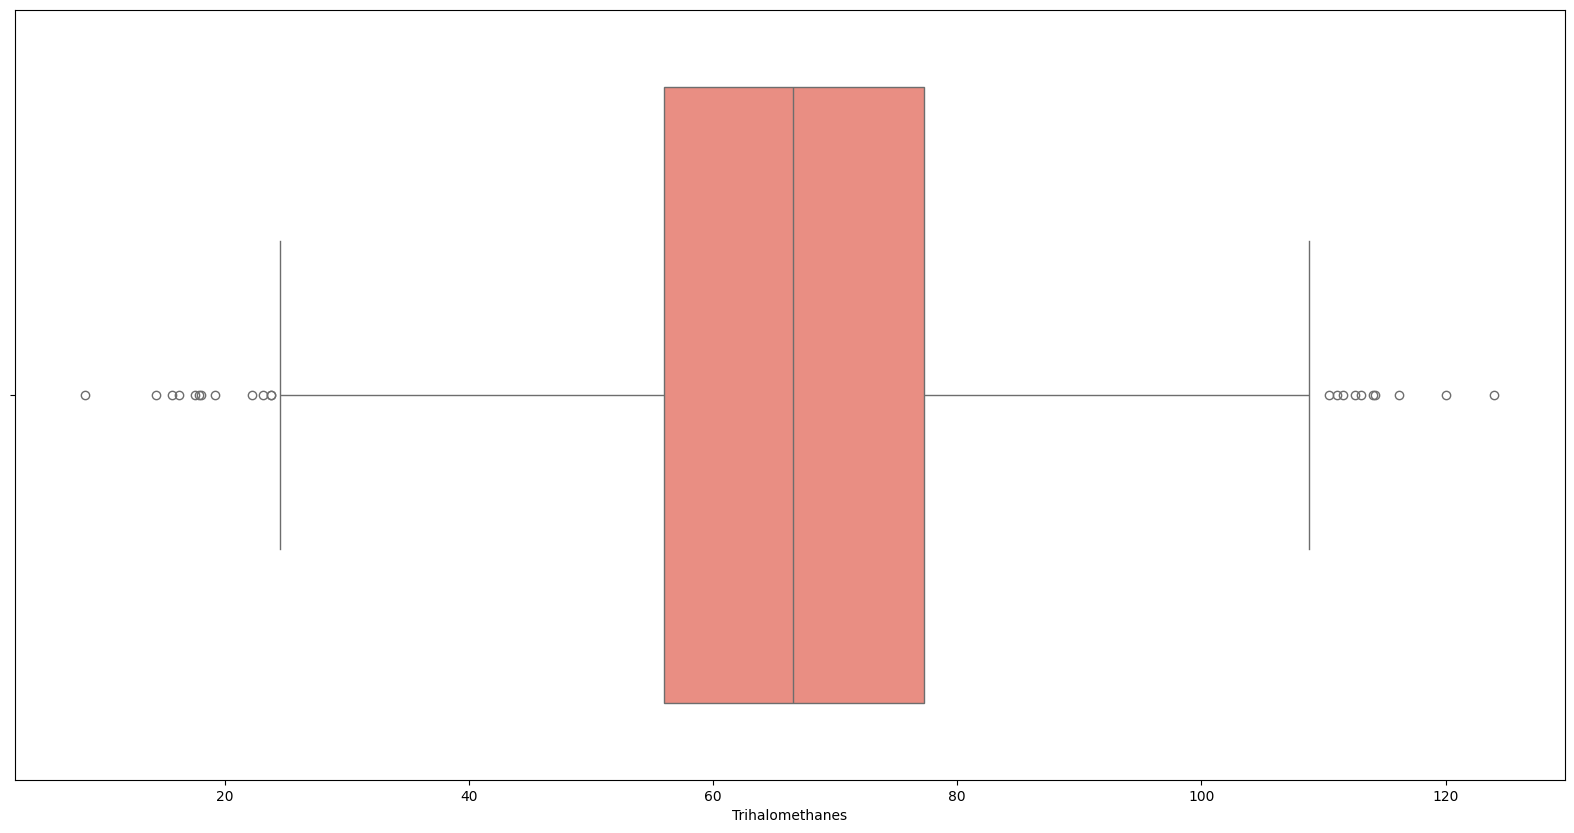

In [142]:
sns.boxplot(data=df1,x="Trihalomethanes")

In [143]:
q1=df1['Trihalomethanes'].quantile(.25)
q3=df1['Trihalomethanes'].quantile(.75)
iqr=q3-q1
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

new_df1.loc[(new_df1['Trihalomethanes']>upper_limit),'Trihalomethanes']=upper_limit
new_df1.loc[(new_df1['Trihalomethanes']<lower_limit),'Trihalomethanes']=lower_limit

Upper limit 109.305
Lower limit 23.944999999999993


<Axes: xlabel='Trihalomethanes'>

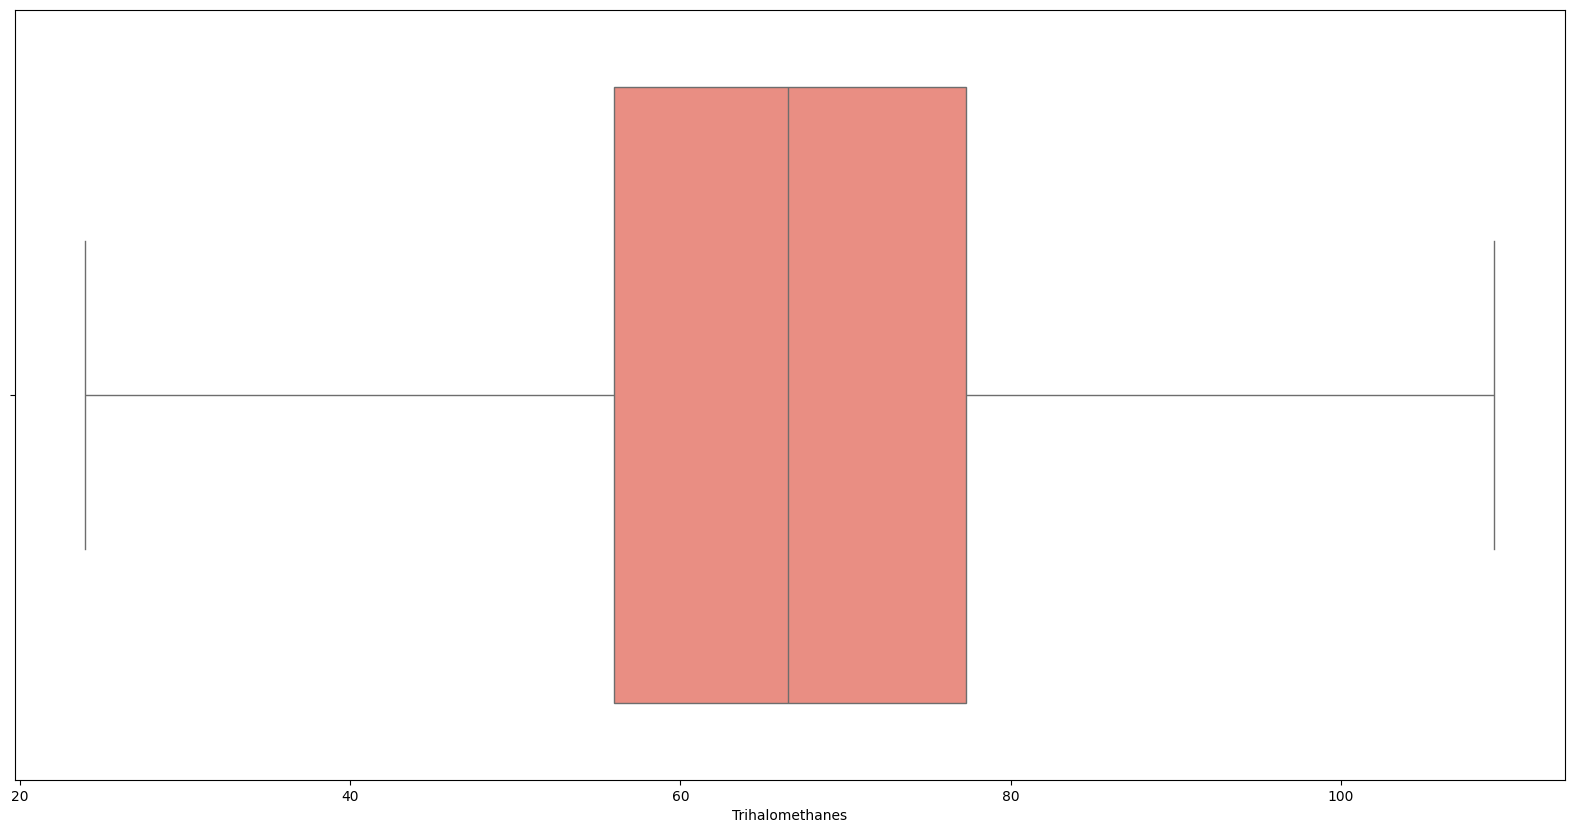

In [144]:
sns.boxplot(data=new_df1,x="Trihalomethanes")

<Axes: xlabel='Trihalomethanes', ylabel='Count'>

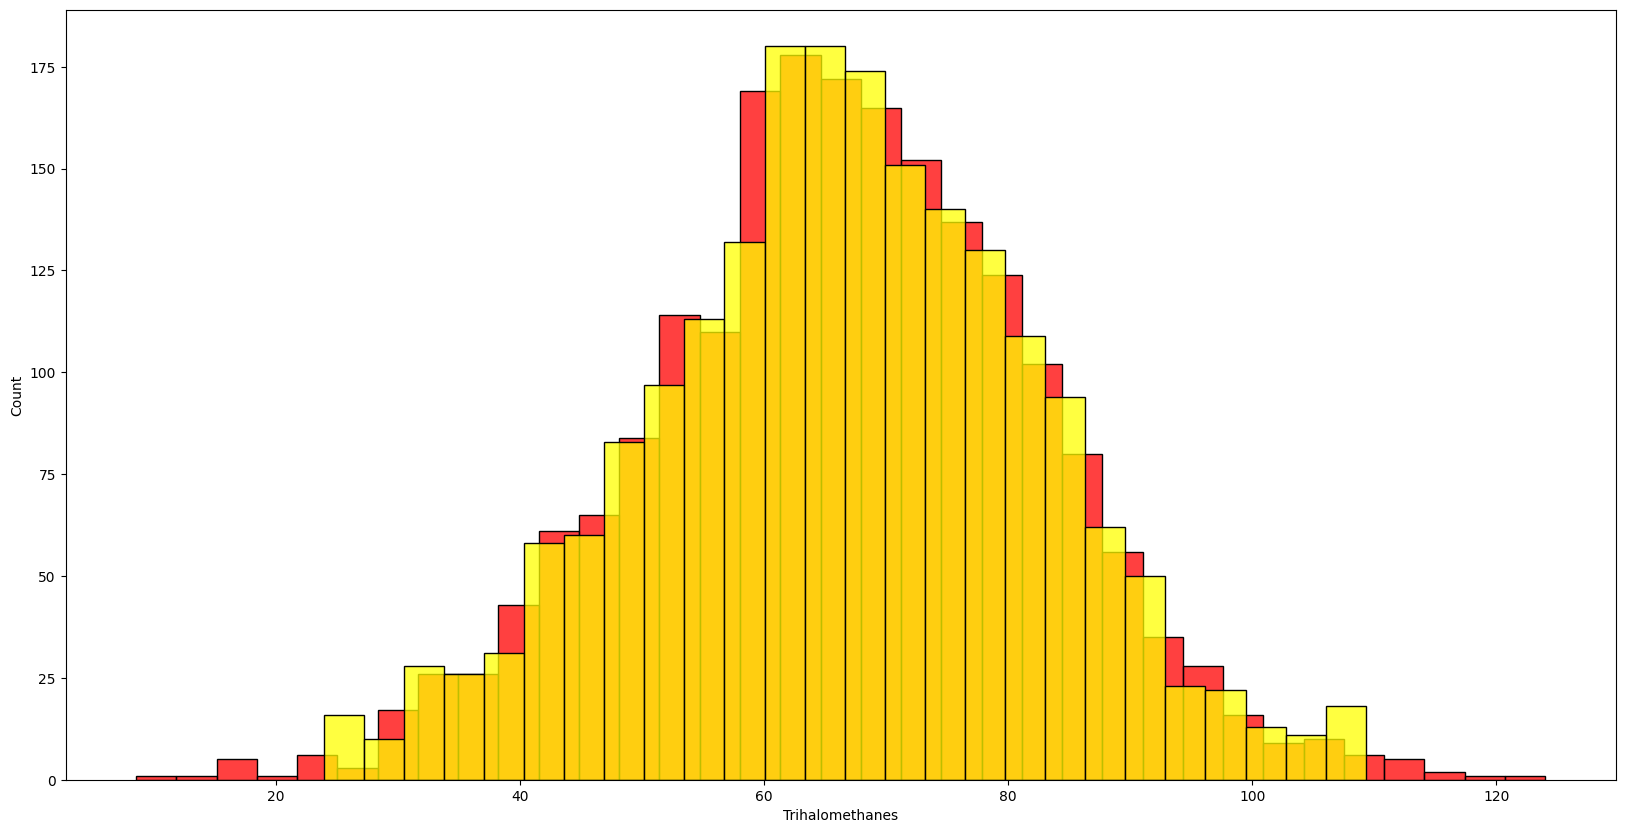

In [147]:
sns.histplot(data=df1,x="Trihalomethanes",color="red")
sns.histplot(data=new_df1,x="Trihalomethanes",color="yellow")

In [148]:
df1.head(1)

ph  Hardness    Solids  Chloramines  Sulfate  Conductivity  \
3  8.32    214.37  22018.42         8.06   356.89        363.27   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
3           18.44           100.34       4.63           0

<Axes: xlabel='Turbidity'>

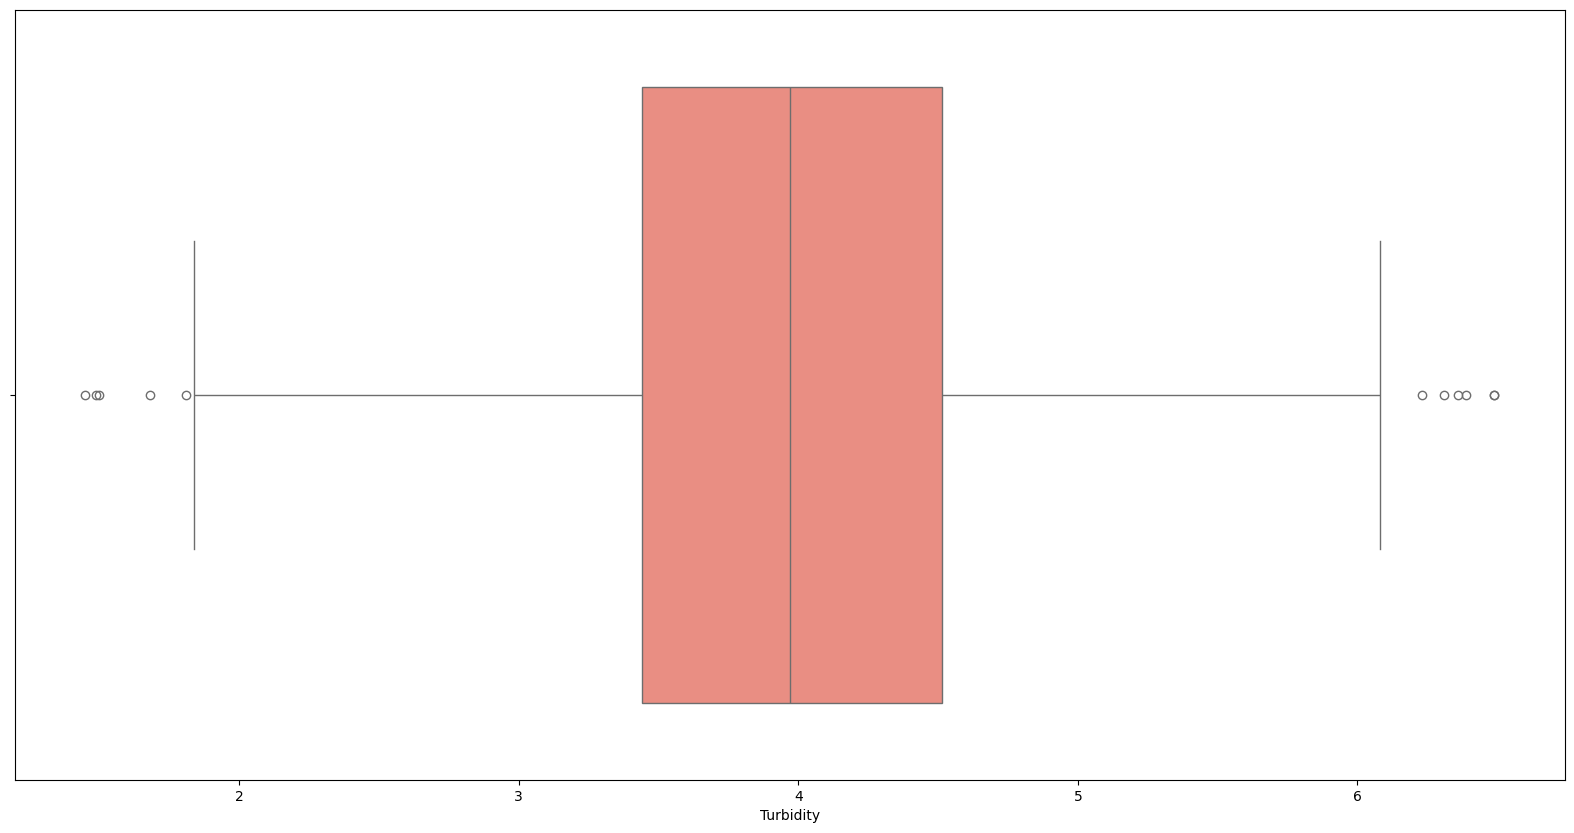

In [149]:
sns.boxplot(data=new_df1,x="Turbidity")

In [150]:
q1=df1['Turbidity'].quantile(.25)
q3=df1['Turbidity'].quantile(.75)
iqr=q3-q1
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

new_df1.loc[(new_df1['Turbidity']>upper_limit),'Turbidity']=upper_limit
new_df1.loc[(new_df1['Turbidity']<lower_limit),'Turbidity']=lower_limit

Upper limit 6.1274999999999995
Lower limit 1.8275000000000003


<Axes: xlabel='Turbidity'>

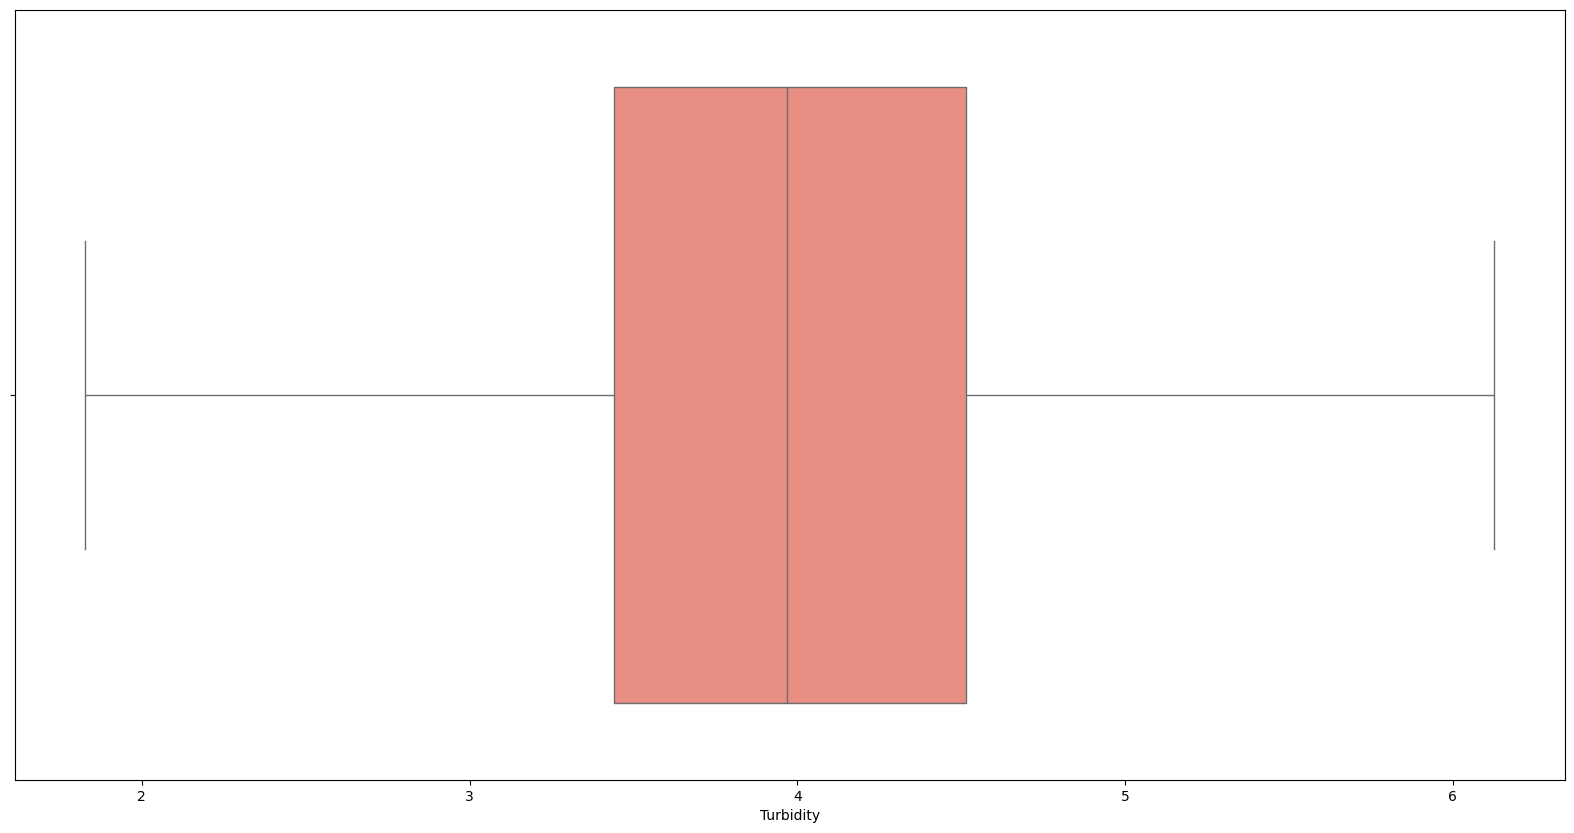

In [151]:
sns.boxplot(data=new_df1,x="Turbidity")

<Axes: xlabel='Turbidity', ylabel='Count'>

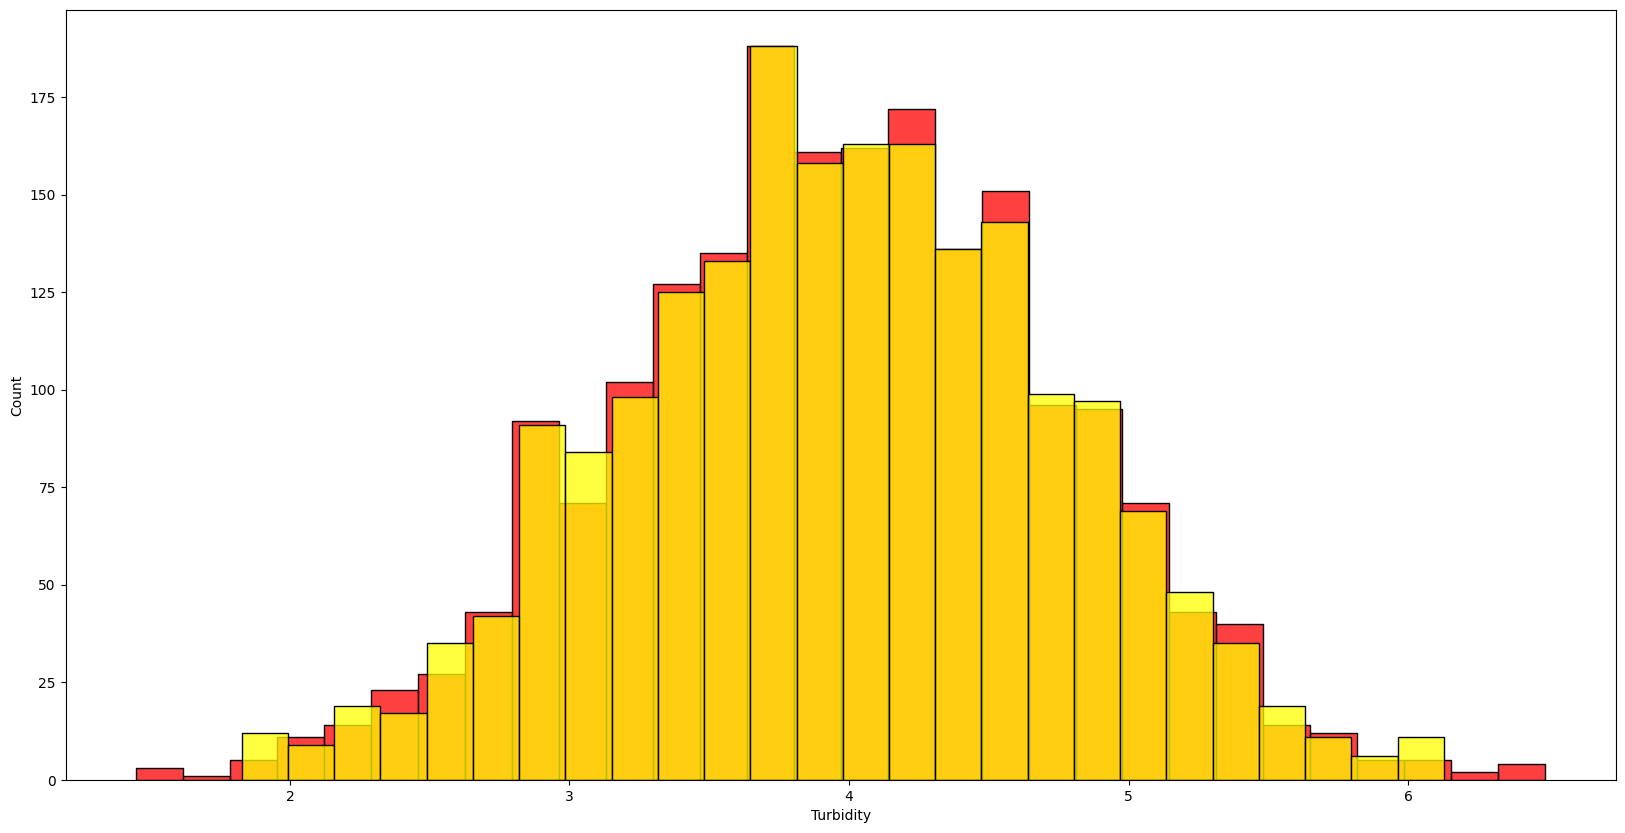

In [153]:
sns.histplot(data=df1,x="Turbidity",color="red")
sns.histplot(data=new_df1,x="Turbidity",color="yellow")

In [155]:
new_df1.describe()

ph    Hardness        Solids  Chloramines      Sulfate  \
count  2011.000000  2011.00000   2011.000000  2011.000000  2011.000000   
mean      7.086962   196.05569  21868.637638     7.131902   333.224664   
std       1.533513    31.89909   8493.143578     1.545711    41.205226   
min       3.150000   117.20250    320.940000     3.185000   129.000000   
25%       6.090000   176.74500  15615.665000     6.140000   307.630000   
50%       7.030000   197.19000  20933.510000     7.140000   332.230000   
75%       8.050000   216.44000  27182.585000     8.110000   359.330000   
max      10.990000   275.98250  44532.965000    11.065000   481.030000   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   2011.000000     2011.000000      2011.000000  2011.000000  2011.000000  
mean     426.418809       14.358028        66.407136     3.969509     0.403282  
std       80.362255        3.307693        15.900005     0.776304     0.490678  
min      201.620000        5.292500        23.945000     1.827500     0.000000  
25%      366.680000       12.125000        55.955000     3.440000     0.000000  
50%      423.460000       14.320000        66.540000     3.970000     0.000000  
75%      482.370000       16.680000        77.295000     4.515000     1.000000  
max      655.905000       23.512500       109.305000     6.127500     1.000000

In [157]:
df1.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2011.000000  2011.000000   2011.000000  2011.000000  2011.000000   
mean      7.086002   195.968026  21917.441243     7.134291   333.224664   
std       1.573394    32.635028   8642.239802     1.584821    41.205226   
min       0.230000    73.490000    320.940000     1.390000   129.000000   
25%       6.090000   176.745000  15615.665000     6.140000   307.630000   
50%       7.030000   197.190000  20933.510000     7.140000   332.230000   
75%       8.050000   216.440000  27182.585000     8.110000   359.330000   
max      14.000000   317.340000  56488.670000    13.130000   481.030000   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   2011.000000     2011.000000      2011.000000  2011.000000  2011.000000  
mean     426.526474       14.357683        66.400855     3.969657     0.403282  
std       80.712672        3.325022        16.077042     0.780294     0.490678  
min      201.620000        2.200000         8.580000     1.450000     0.000000  
25%      366.680000       12.125000        55.955000     3.440000     0.000000  
50%      423.460000       14.320000        66.540000     3.970000     0.000000  
75%      482.370000       16.680000        77.295000     4.515000     1.000000  
max      753.340000       27.010000       124.000000     6.490000     1.000000

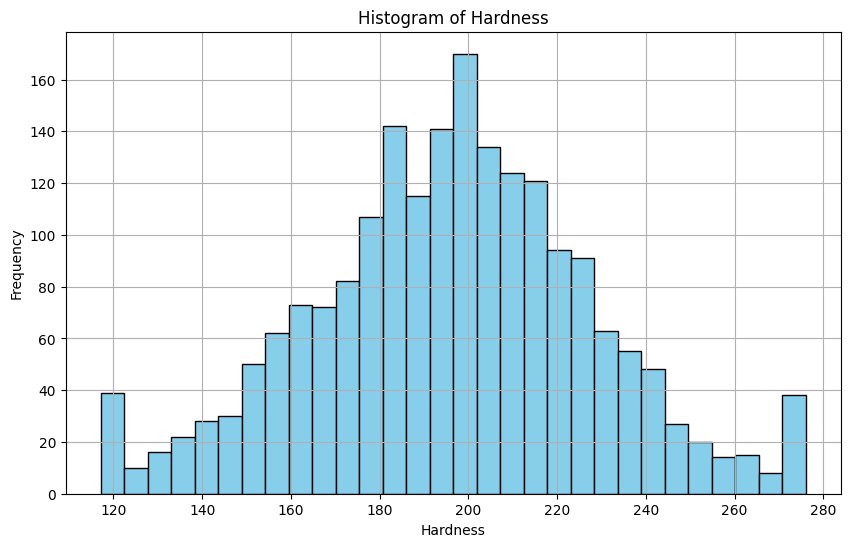

In [132]:

# Assuming df is your DataFrame containing the dataset

# Plot histogram of 'Hardness'
plt.figure(figsize=(10, 6))
plt.hist(new_df1['Hardness'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Hardness')
plt.xlabel('Hardness')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


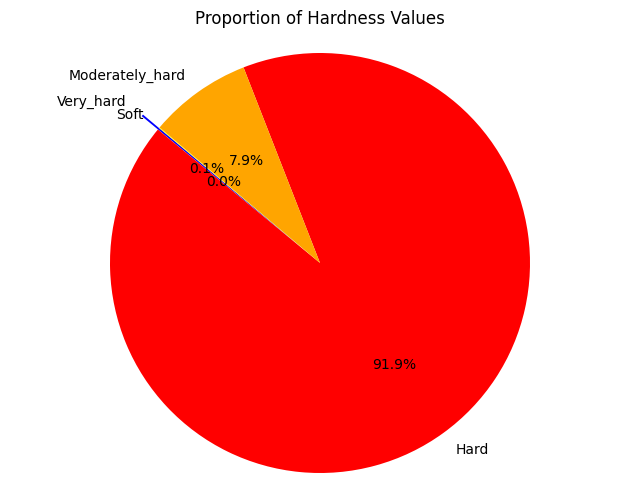

In [45]:

Very_hard = (df1['Hardness'] > 300).sum()
Hard = ((df1['Hardness'] <= 300) & (df1['Hardness'] > 151)).sum()
Moderately_hard = ((df1['Hardness'] <= 151) & (df1['Hardness'] > 76)).sum()
Soft = len(df1) - (Very_hard + Hard + Moderately_hard)

# Create data for the pie chart
sizes = [Very_hard, Hard, Moderately_hard, Soft]
labels = ['Very_hard', 'Hard', 'Moderately_hard', 'Soft']
colors = ['blue', 'red', 'orange', 'yellow']
explode = (0.1, 0, 0, 0)  # Explode the 'Very_hard' slice

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Hardness Values')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [46]:

Very_hard = (df1['Hardness'] > 300).sum()
Hard = ((df1['Hardness'] <= 300) & (df1['Hardness'] > 151)).sum()
Moderately_hard = ((df1['Hardness'] <= 151) & (df1['Hardness'] > 76)).sum()
Soft = len(df1) - (Very_hard + Hard + Moderately_hard)

# Create data for the bar chart
categories = ['Very_hard', 'Hard', 'Moderately_hard', 'Soft']

values_potability_zero = [potability_zero_Very_hard, potability_zero_Hard, potability_zero_Moderately_hard,potability_zero_Soft]
values_potability_one =[potability_one_Very_hard, potability_one_Hard, potability_one_Moderately_hard,potability_one_Soft]
values = [Very_hard, Hard, Moderately_hard, Soft]
colors = ['blue', 'red', 'orange', 'yellow']

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=colors)
plt.title('Number of Samples in Hardness Categories')
plt.bar(categories, values_potability_zero, color='skyblue', label='Potability=0')
plt.bar(categories, values_potability_one, bottom=values_potability_zero, color='lightcoral', label='Potability=1')
plt.xlabel('Hardness Categories')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines along the y-axis
plt.show()


NameError: name 'potability_zero_Very_hard' is not defined

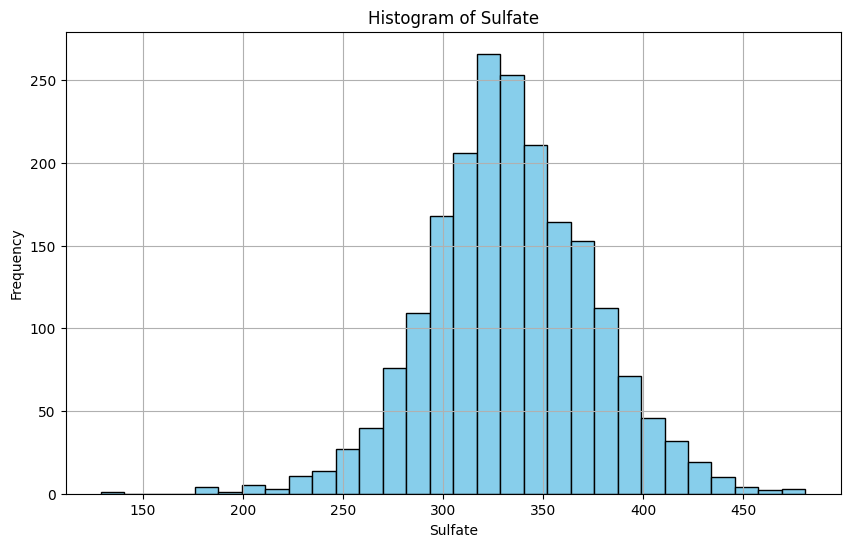

In [62]:
plt.figure(figsize=(10, 6))
plt.hist(df1['Sulfate'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Sulfate')
plt.xlabel('Sulfate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


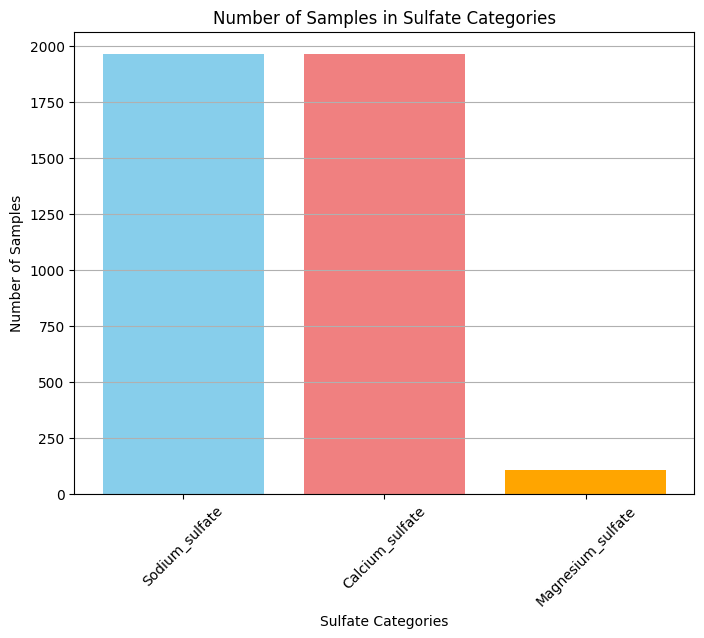

In [66]:




Sodium_sulfate = ((df1['Sulfate'] <= 500) & (df1['Sulfate'] >=250)).sum()
Calcium_sulfate = ((df1['Sulfate'] <= 1000) & (df1['Sulfate'] >=250)).sum()
Magnesium_sulfate = ((df1['Sulfate'] <= 600) & (df1['Sulfate'] >=400)).sum()

# Create data for the bar chart
categories = ['Sodium_sulfate', 'Calcium_sulfate',  'Magnesium_sulfate']
values = [Sodium_sulfate,Calcium_sulfate,Magnesium_sulfate]

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['skyblue', 'lightcoral', 'orange', 'lightgreen'])

plt.title('Number of Samples in Sulfate Categories')
plt.xlabel('Sulfate Categories')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines along the y-


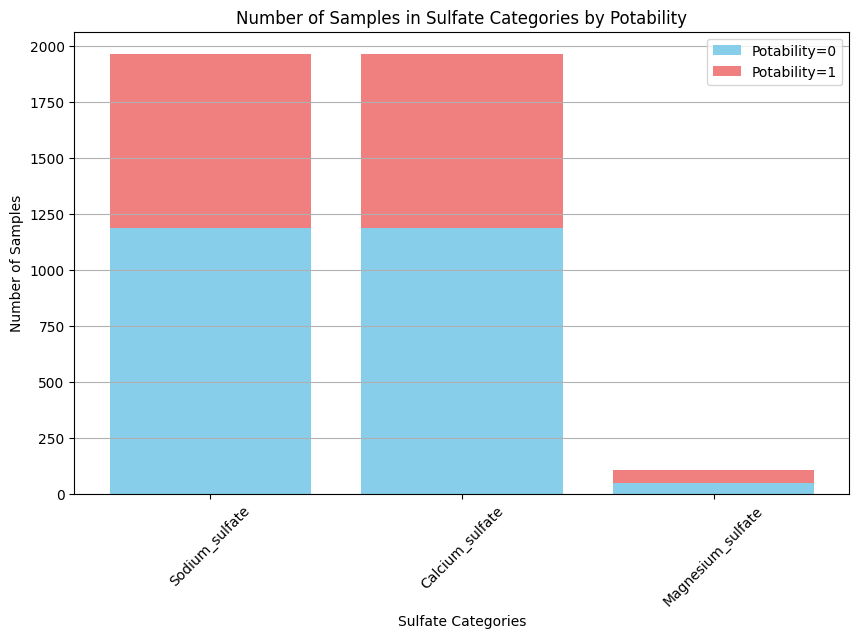

In [64]:

# Count the number of values in different sulfate categories
Sodium_sulfate = ((df1['Sulfate'] <= 500) & (df1['Sulfate'] >= 250)).sum()
Calcium_sulfate = ((df1['Sulfate'] <= 1000) & (df1['Sulfate'] >= 250)).sum()
Magnesium_sulfate = ((df1['Sulfate'] <= 600) & (df1['Sulfate'] >= 400)).sum()

# Count the number of samples with potability=0 in each sulfate category
potability_zero_Sodium_sulfate = ((df1['Sulfate'] <= 500) & (df1['Sulfate'] >= 250) & (df1['Potability'] == 0)).sum()
potability_zero_Calcium_sulfate = ((df1['Sulfate'] <= 1000) & (df1['Sulfate'] >= 250) & (df1['Potability'] == 0)).sum()
potability_zero_Magnesium_sulfate = ((df1['Sulfate'] <= 600) & (df1['Sulfate'] >= 400) & (df1['Potability'] == 0)).sum()

# Create data for the bar chart
categories = ['Sodium_sulfate', 'Calcium_sulfate', 'Magnesium_sulfate']
values_potability_zero = [potability_zero_Sodium_sulfate, potability_zero_Calcium_sulfate, potability_zero_Magnesium_sulfate]
values_potability_one = [Sodium_sulfate - potability_zero_Sodium_sulfate, Calcium_sulfate - potability_zero_Calcium_sulfate, Magnesium_sulfate - potability_zero_Magnesium_sulfate]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, values_potability_zero, color='skyblue', label='Potability=0')
plt.bar(categories, values_potability_one, bottom=values_potability_zero, color='lightcoral', label='Potability=1')
plt.title('Number of Samples in Sulfate Categories by Potability')
plt.xlabel('Sulfate Categories')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid(axis='y')  # Add gridlines along the y-axis
plt.show()
